# Data Preparation

In [1]:
# Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

plt.style.use('ggplot')

pd.options.display.max_columns = None

In [2]:
loan_data_backup = pd.read_csv('data/raw/loan_data_2007_2014.csv', index_col=0, low_memory=False)

In [3]:
loan_data = loan_data_backup.copy()

# Explore Data

In [4]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1 year,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
loan_data.shape

(466285, 74)

In [6]:
loan_data.columns.values

array(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'issue_d', 'loan_status', 'pymnt_plan',
       'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti',
       'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths',
       'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
       'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d',
       'last_credit_pull_d', 'collections_12_mths_ex_med',
       'mths_since_last_major_derog', 'policy_code', 'application_type',
       'annual_inc_joint', 'dti_joint', 'verification_status_joint

In [7]:
loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 466284
Data columns (total 74 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           466285 non-null  int64  
 1   member_id                    466285 non-null  int64  
 2   loan_amnt                    466285 non-null  int64  
 3   funded_amnt                  466285 non-null  int64  
 4   funded_amnt_inv              466285 non-null  float64
 5   term                         466285 non-null  object 
 6   int_rate                     466285 non-null  float64
 7   installment                  466285 non-null  float64
 8   grade                        466285 non-null  object 
 9   sub_grade                    466285 non-null  object 
 10  emp_title                    438697 non-null  object 
 11  emp_length                   445277 non-null  object 
 12  home_ownership               466285 non-null  object 
 13 

# Preprocessing

Preprocessing continuous variables

In [8]:
loan_data['emp_length'].unique()

array(['10+ years', '< 1 year', '1 year', '3 years', '8 years', '9 years',
       '4 years', '5 years', '6 years', '2 years', '7 years', nan],
      dtype=object)

In [9]:
loan_data['emp_length'] = loan_data['emp_length'].str.replace('\+ years', '',regex=True)
loan_data['emp_length'] = loan_data['emp_length'].str.replace('< 1 year', str(0), regex=True)
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' years', '', regex=True)
loan_data['emp_length'] = loan_data['emp_length'].str.replace(' year', '', regex=True)
loan_data['emp_length'] = loan_data['emp_length'].fillna(0)

loan_data['emp_length'] = pd.to_numeric(loan_data['emp_length'])

In [10]:
display(loan_data['emp_length'].unique())
display(type(loan_data['emp_length'][0]))

array([10,  0,  1,  3,  8,  9,  4,  5,  6,  2,  7], dtype=int64)

numpy.int64

In [11]:
loan_data['earliest_cr_line']

0         Jan-85
1         Apr-99
2         Nov-01
3         Feb-96
4         Jan-96
           ...  
466280    Apr-03
466281    Jun-97
466282    Dec-01
466283    Feb-03
466284    Feb-00
Name: earliest_cr_line, Length: 466285, dtype: object

In [12]:
loan_data['earliest_cr_line_date'] = pd.to_datetime(loan_data['earliest_cr_line'], format='%b-%y')

In [13]:
type(loan_data['earliest_cr_line_date'][0])

pandas._libs.tslibs.timestamps.Timestamp

In [14]:
# should use todays date, but will use older date for older dataset
loan_data['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [15]:
loan_data['mths_since_earliest_cr_line']

0         395.0
1         224.0
2         193.0
3         262.0
4         263.0
          ...  
466280    176.0
466281    246.0
466282    192.0
466283    178.0
466284    214.0
Name: mths_since_earliest_cr_line, Length: 466285, dtype: float64

In [16]:
loan_data['mths_since_earliest_cr_line'].describe()

count    466256.000000
mean        239.482430
std          93.974829
min        -612.000000
25%         183.000000
50%         225.000000
75%         285.000000
max         587.000000
Name: mths_since_earliest_cr_line, dtype: float64

In [17]:
loan_data.loc[: , ['earliest_cr_line', 'earliest_cr_line_date', 'mths_since_earliest_cr_line']][loan_data['mths_since_earliest_cr_line'] < 0]

,earliest_cr_line,earliest_cr_line_date,mths_since_earliest_cr_line
1580,Sep-62,2062-09-01,-537.0
1770,Sep-68,2068-09-01,-609.0
2799,Sep-64,2064-09-01,-561.0
3282,Sep-67,2067-09-01,-597.0
3359,Feb-65,2065-02-01,-566.0
...,...,...,...
464003,Jan-68,2068-01-01,-601.0
464260,Jul-66,2066-07-01,-583.0
465100,Oct-67,2067-10-01,-598.0
465500,Sep-67,2067-09-01,-597.0


In [18]:
#most likley that these years were interpreted incorrectly and should be 1962 etc instead of 2062.
df = loan_data[loan_data['mths_since_earliest_cr_line'] < 0].copy()
df['earliest_cr_line_date'] = df['earliest_cr_line_date'].astype('str')

In [19]:
df['earliest_cr_line_date'] = pd.to_datetime(df['earliest_cr_line_date'].apply(lambda x: '19' + x[2:]))
df['earliest_cr_line_date']

1580     1962-09-01
1770     1968-09-01
2799     1964-09-01
3282     1967-09-01
3359     1965-02-01
            ...    
464003   1968-01-01
464260   1966-07-01
465100   1967-10-01
465500   1967-09-01
465655   1956-01-01
Name: earliest_cr_line_date, Length: 1169, dtype: datetime64[ns]

In [20]:
# re run or code to get the time difference in months
df['mths_since_earliest_cr_line'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - df['earliest_cr_line_date']) / np.timedelta64(1, 'M')))

In [21]:
# Now ill drop the incorrect rows from the loan_data df and replace them with the new values.

#keep only columns with value greater than 0 and NA for now
loan_data = loan_data[(loan_data['mths_since_earliest_cr_line'] >= 0) | loan_data['mths_since_earliest_cr_line'].isna()]
# merge the updated data back to our df
loan_data = pd.concat([loan_data, df])

# check to see we have the same amount of rows to when we started
print(loan_data.shape)

(466285, 76)


In [22]:
loan_data.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,earliest_cr_line_date,mths_since_earliest_cr_line
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,NaN,10,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0.0,Jan-85,1.0,NaN,NaN,3.0,0.0,13648,83.7,9.0,f,0.0,0.0,5861.071414,5831.78,5000.00,861.07,0.00,0.00,0.00,Jan-15,171.62,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985-01-01,395.0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,Ryder,0,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0.0,Apr-99,5.0,NaN,NaN,3.0,0.0,1687,9.4,4.0,f,0.0,0.0,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999-04-01,224.0
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,NaN,10,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,NaN,small_business,real estate business,606xx,IL,8.72,0.0,Nov-01,2.0,NaN,NaN,2.0,0.0,2956,98.5,10.0,f,0.0,0.0,3003.653644,3003.65,2400.00,603.65,0.00,0.00,0.00,Jun-14,649.91,NaN,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2001-11-01,193.0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,AIR RESOURCES BOARD,10,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0.0,Feb-96,1.0,35.0,NaN,10.0,0.0,5598,21.0,37.0,f,0.0,0.0,12226.302210,12226.30,10000.00,2209.33,16.97,0.00,0.00,Jan-15,357.48,NaN,Jan-15,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996-02-01,262.0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,University Medical Group,1,RENT,80000.0,Source Verified,Dec-11,Current,n,https://www.lendingclub.com/browse/loanDetail....,Borrower added on 12/21/11 > I plan on combi...,other,Personal,972xx,OR,17.94,0.0,Jan-96,0.0,38.0,NaN,15.0,0.0,27783,53.9,38.0,f,766.9,766.9,3242.170000,3242.17,2233.10,1009.07,0.00,0.00,0.00,Jan-16,67.79,Feb-16,Jan-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1996-01-01,263.0


In [23]:
loan_data['term']

0          36 months
1          60 months
2          36 months
3          36 months
4          60 months
             ...    
464003     36 months
464260     36 months
465100     36 months
465500     36 months
465655     36 months
Name: term, Length: 466285, dtype: object

In [24]:
loan_data['term'] = loan_data['term'].str.replace(' months', '').astype('int')

In [25]:
loan_data['issue_d'] 

0         Dec-11
1         Dec-11
2         Dec-11
3         Dec-11
4         Dec-11
           ...  
464003    Jan-14
464260    Jan-14
465100    Jan-14
465500    Jan-14
465655    Jan-14
Name: issue_d, Length: 466285, dtype: object

In [26]:
loan_data['issue_d'] = pd.to_datetime(loan_data['issue_d'], format= '%b-%y')

In [27]:
print(loan_data['issue_d'].min(), " - ", loan_data['issue_d'].max())

2007-06-01 00:00:00  -  2014-12-01 00:00:00


In [28]:
loan_data['mths_since_issue_d'] = round(pd.to_numeric((pd.to_datetime('2017-12-01') - loan_data['issue_d']) / np.timedelta64(1, 'M')))

In [29]:
loan_data['mths_since_issue_d']

0         72.0
1         72.0
2         72.0
3         72.0
4         72.0
          ... 
464003    47.0
464260    47.0
465100    47.0
465500    47.0
465655    47.0
Name: mths_since_issue_d, Length: 466285, dtype: float64

In [30]:
pd.get_dummies(loan_data['grade'], prefix = 'grade', prefix_sep=':')

,grade:A,grade:B,grade:C,grade:D,grade:E,grade:F,grade:G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...
464003,0,0,1,0,0,0,0
464260,1,0,0,0,0,0,0
465100,0,1,0,0,0,0,0
465500,0,0,0,1,0,0,0


In [31]:
loan_data.select_dtypes('object').columns

Index(['grade', 'sub_grade', 'emp_title', 'home_ownership',
       'verification_status', 'loan_status', 'pymnt_plan', 'url', 'desc',
       'purpose', 'title', 'zip_code', 'addr_state', 'earliest_cr_line',
       'initial_list_status', 'last_pymnt_d', 'next_pymnt_d',
       'last_credit_pull_d', 'application_type'],
      dtype='object')

In [32]:
cat_columns = ['grade','sub_grade', 'home_ownership', 'verification_status', 'loan_status', 'purpose','addr_state', 'initial_list_status']


def one_hot_encode(df, columns):

    loan_data_dummies = pd.DataFrame()
    
    for col in columns:
        loan_data_dummy = pd.get_dummies(df[col], prefix=col, prefix_sep=':')
        loan_data_dummies = pd.concat([loan_data_dummies, loan_data_dummy], axis=1)
        
    df = pd.concat([df, loan_data_dummies], axis=1)
    
    return df

loan_data = one_hot_encode(loan_data, cat_columns)

loan_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 466285 entries, 0 to 465655
Columns: 203 entries, id to initial_list_status:w
dtypes: datetime64[ns](2), float64(48), int32(1), int64(7), object(19), uint8(126)
memory usage: 331.7+ MB


In [33]:
loan_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade',
       ...
       'addr_state:TX', 'addr_state:UT', 'addr_state:VA', 'addr_state:VT',
       'addr_state:WA', 'addr_state:WI', 'addr_state:WV', 'addr_state:WY',
       'initial_list_status:f', 'initial_list_status:w'],
      dtype='object', length=203)

# Check for missing Values

In [34]:
pd.options.display.max_rows = 50
null_values = loan_data.columns[loan_data.isna().sum() > 0]
loan_data[null_values].isna().sum()

emp_title                       27588
annual_inc                          4
desc                           340302
title                              20
delinq_2yrs                        29
earliest_cr_line                   29
inq_last_6mths                     29
mths_since_last_delinq         250351
mths_since_last_record         403647
open_acc                           29
pub_rec                            29
revol_util                        340
total_acc                          29
last_pymnt_d                      376
next_pymnt_d                   227214
last_credit_pull_d                 42
collections_12_mths_ex_med        145
mths_since_last_major_derog    367311
annual_inc_joint               466285
dti_joint                      466285
verification_status_joint      466285
acc_now_delinq                     29
tot_coll_amt                    70276
tot_cur_bal                     70276
open_acc_6m                    466285
open_il_6m                     466285
open_il_12m 

In [35]:
# fill the revolving limit with the funder amount
loan_data['total_rev_hi_lim'].fillna(loan_data['funded_amnt'], inplace=True)
loan_data['total_rev_hi_lim'].isna().sum()

0

In [36]:
# fill missing values in annual income replace with the mean of all other income values
loan_data['annual_inc'].fillna(loan_data['annual_inc'].mean(), inplace=True) 
loan_data['annual_inc'].isna().sum()

0

In [37]:
cols_to_fill_0 = ['mths_since_earliest_cr_line','acc_now_delinq', 'total_acc','pub_rec', 'open_acc', 'inq_last_6mths','delinq_2yrs']

def fill_null_as_0(df, columns):
    for col in columns:
        df[col].fillna(0, inplace=True)
        
        
fill_null_as_0(loan_data, cols_to_fill_0)
loan_data[cols_to_fill_0].isna().sum()

mths_since_earliest_cr_line    0
acc_now_delinq                 0
total_acc                      0
pub_rec                        0
open_acc                       0
inq_last_6mths                 0
delinq_2yrs                    0
dtype: int64

# Prepare our target varialbe

In [38]:
loan_data['loan_status'].value_counts(normalize=True)

Current                                                0.480878
Fully Paid                                             0.396193
Charged Off                                            0.091092
Late (31-120 days)                                     0.014798
In Grace Period                                        0.006747
Does not meet the credit policy. Status:Fully Paid     0.004263
Late (16-30 days)                                      0.002612
Default                                                0.001784
Does not meet the credit policy. Status:Charged Off    0.001632
Name: loan_status, dtype: float64

---
We will create a new column 'good_bad' and use the value 1 for a good loan and 0 for loan defulats.

In [39]:
loan_data['good_bad'] = np.where(loan_data['loan_status'].isin(['Charded Off', 'Default', 'Does not meet the credit policy. Status:Charged Off', 'Late (31-120 days)']), 0, 1) 

In [40]:
loan_data['good_bad'].value_counts(normalize=True)

1    0.981786
0    0.018214
Name: good_bad, dtype: float64

In [41]:
#Split the data for model training
X_train, X_test, y_train, y_test = train_test_split(loan_data.drop('good_bad', axis=1), loan_data['good_bad'], test_size=0.2, random_state=42) 

---
# WoE

To build a PD model we will need to create a scorecard. <br> We will need to bin all of variables. This means we will need to discretize our continious variables. 
Once we bin these variables in the proportions of our choice (fine classing) we can then use Weight of Evidence (WOE) for more effecitve binning (coarse classing). <br> This will evaluate the impact of each variable on the target variable and group bins with similar WOE. 

$\Large{\text{WoE}_i = \ln (\frac{\%(y=1)_i}{\%(y=0)_i})}$ in our case this equation would be $\Large{\text{WoE}_i =\ln (\frac{\% \text{good loan}_i}{\% \text{bad loan}_i})} $

# Information Value
This shows how much information the original independent variable provides with respect to explaining the dependent variable. <br>
This value will help us select the best independant variables to predict our target variable.

$ \Large{\text{IV} = \sum_{i=1}^{n}(\% (y=1)_i - \%(y=0)_i) \cdot \text{WoE}_i} $


In [42]:
def woe_discrete(df , discrete_variable_name, good_bad_variable_df):
    
    # concat the categorical column and the target variable column
    df = pd.concat([df[discrete_variable_name], good_bad_variable_df],
                   axis=1)
    # create 2 columns by grouping by the categorical value and calculating the count and the mean(which is the percentage in this case)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    # drop the duplicate column
    df = df.iloc[:, [0,1,3]]
    # rename the columns
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    # calculate the proportion of observations per category
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    # calculate the number of good observations
    df['n_good'] = df['prop_good'] * df['n_obs']
    # calculate the number of bad observations
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    # calculate proportion of good observations per category, compared to the total number of observations across all categories 
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    # calculate proportion of bad observations per category, compared to the total number of observations across all categories 
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    # calculate WoE using the formula above
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    # sort by WoE and reset index
    df = df.sort_values(['WoE'])
    df = df.reset_index(drop = True)
    # calculate the good proportions difference compared to the previous row
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    # calculate the WoE difference compared to the previous row
    df['diff_WoE'] = df["WoE"].diff().abs()
    # Calculate the information value for the variable
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    
    return df
    


In [43]:
def plot_by_woe(df_WoE, x_label_rotation=0):
    ''' Plot the variables WoE'''
    # get the cateogry column as our x-axis
    x = np.array(df_WoE.iloc[:, 0].apply(str))
    # get the WoE column as our y-axis
    y = df_WoE['WoE']
    # set plot size
    fig, ax1 = plt.subplots(figsize=(18,6))
    # plot our line data
    color = 'blue'
    ax1.set_xlabel(df_WoE.columns[0])
    ax1.set_ylabel('Weight of Evidence', color=color)
    ax1.plot(x, y, marker='o', linestyle='--', label='Weight of Evidence', color=color)
    ax1.tick_params(axis='y', labelcolor=color)
    plt.xticks(rotation = x_label_rotation)
    ax1.legend(bbox_to_anchor=(0.4, 1.2))
    # plot our bar data on a second y-axis
    ax2 = ax1.twinx()
    color = 'red'
    ax2.bar(x=x , height=df_WoE['n_obs'], label='Observations', color=color, alpha=0.7)
    ax2.set_ylabel('Observations', color=color)
    ax2.tick_params(axis='y', labelcolor=color)
    ax2.legend(bbox_to_anchor=(0.6, 1.2))
    fig.tight_layout()
    plt.show()


 GRADE 



,grade,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,G,2621,0.939718,0.007026,2463.0,158.0,0.006726,0.023039,-1.231141,NaN,NaN,0.331525
1,F,10648,0.962246,0.028545,10246.0,402.0,0.027982,0.058618,-0.739491,0.022529,0.491650,0.331525
2,E,28568,0.964436,0.076584,27552.0,1016.0,0.075244,0.148148,-0.677480,0.002189,0.062011,0.331525
3,D,61589,0.972463,0.165106,59893.0,1696.0,0.163566,0.247302,-0.413395,0.008027,0.264085,0.331525
4,C,100303,0.980180,0.268889,98315.0,1988.0,0.268496,0.289880,-0.076634,0.007717,0.336760,0.331525
5,B,109240,0.988136,0.292847,107944.0,1296.0,0.294792,0.188976,0.444648,0.007956,0.521282,0.331525
6,A,60059,0.994972,0.161004,59757.0,302.0,0.163195,0.044036,1.309933,0.006835,0.865285,0.331525


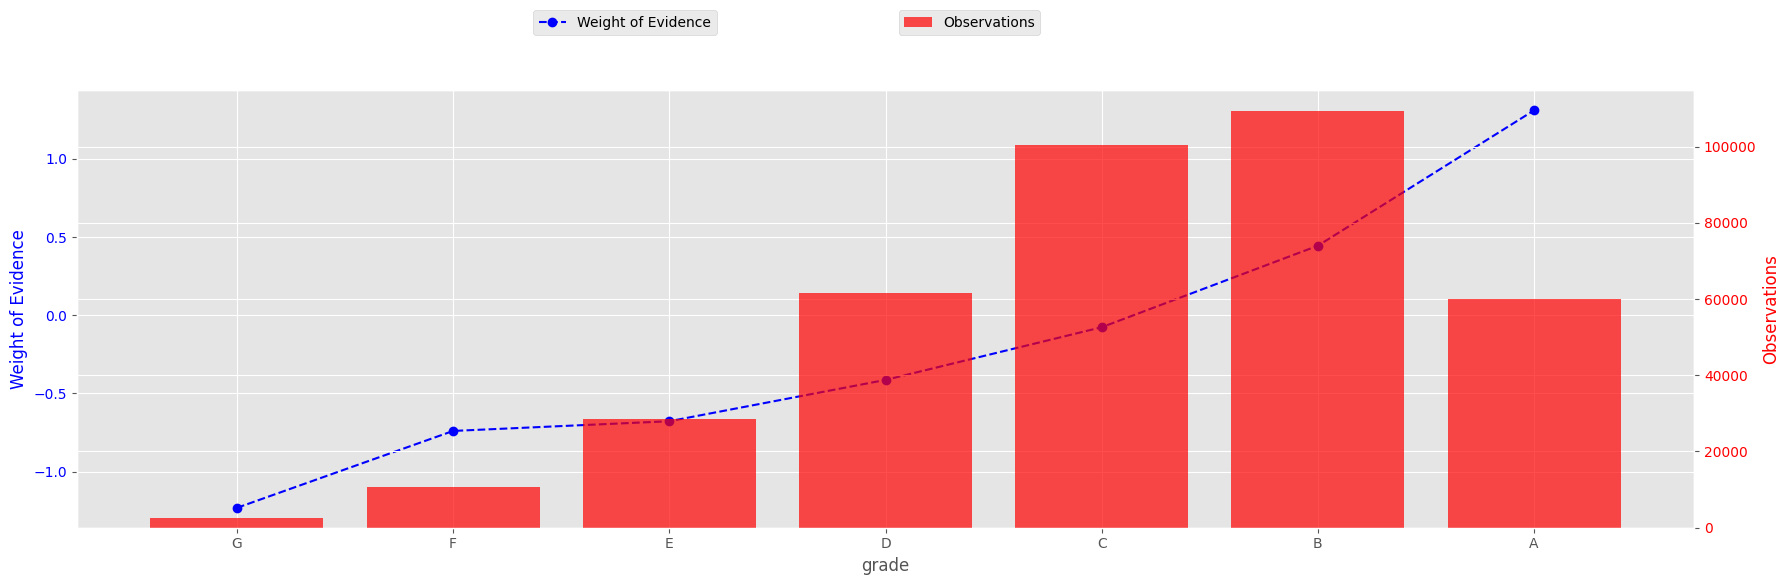


 HOME_OWNERSHIP 



,home_ownership,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,OTHER,135,0.925926,0.000362,125.0,10.0,0.000341,0.001458,-1.451953,NaN,NaN,inf
1,NONE,39,0.974359,0.000105,38.0,1.0,0.000104,0.000146,-0.340096,0.048433,1.111858,inf
2,RENT,150560,0.979304,0.403616,147444.0,3116.0,0.402665,0.454360,-0.120784,0.004945,0.219312,inf
3,OWN,33440,0.980742,0.089645,32796.0,644.0,0.089565,0.093905,-0.047319,0.001438,0.073465,inf
4,MORTGAGE,188853,0.983654,0.506270,185766.0,3087.0,0.507322,0.450131,0.119606,0.002912,0.166925,inf
5,ANY,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.016346,inf,inf


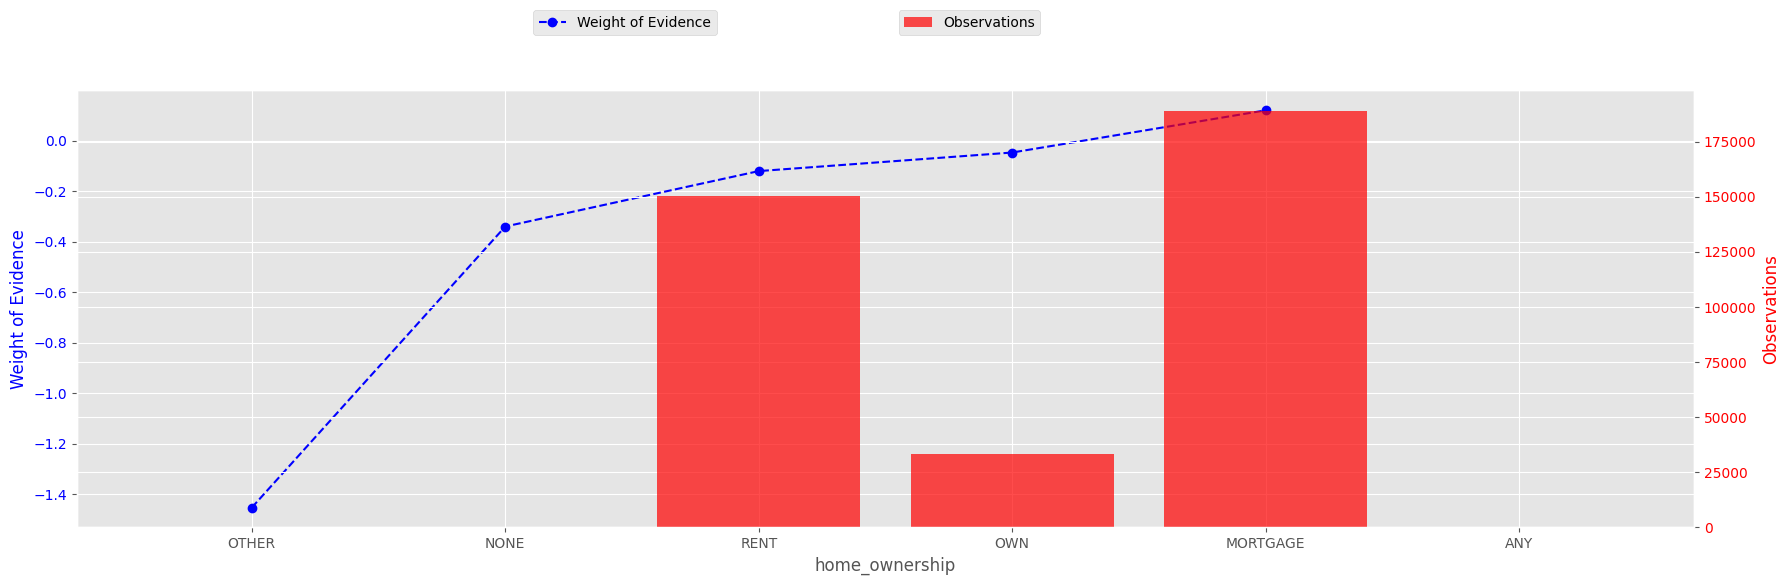


 VERIFICATION_STATUS 



,verification_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,Source Verified,119969,0.979595,0.321609,117521.0,2448.0,0.320947,0.356955,-0.106336,NaN,NaN,0.010983
1,Verified,134340,0.981152,0.360134,131808.0,2532.0,0.359964,0.369204,-0.025345,0.001558,0.080991,0.010983
2,Not Verified,118719,0.984181,0.318258,116841.0,1878.0,0.319089,0.273841,0.152925,0.003029,0.178270,0.010983


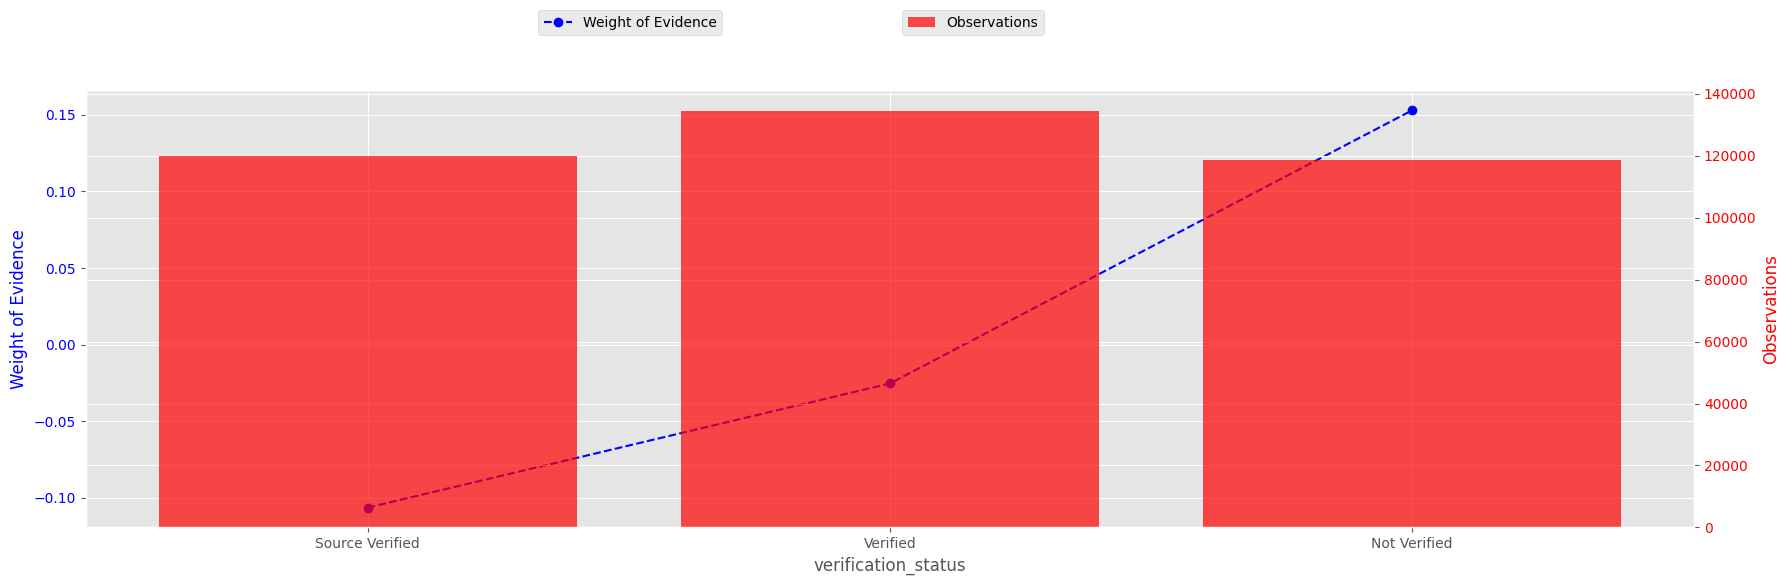


 PURPOSE 



,purpose,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,educational,331,0.924471,0.000887,306.0,25.0,0.000836,0.003645,-1.472973,NaN,NaN,0.023277
1,small_business,5602,0.973045,0.015018,5451.0,151.0,0.014887,0.022018,-0.391407,0.048574,1.081565,0.023277
2,moving,2391,0.978670,0.006410,2340.0,51.0,0.006390,0.007437,-0.151601,0.005625,0.239806,0.023277
3,other,19049,0.978897,0.051066,18647.0,402.0,0.050924,0.058618,-0.140693,0.000227,0.010908,0.023277
4,medical,3720,0.979032,0.009972,3642.0,78.0,0.009946,0.011374,-0.134102,0.000136,0.006591,0.023277
5,debt_consolidation,219438,0.980705,0.588261,215204.0,4234.0,0.587716,0.617381,-0.049243,0.001673,0.084860,0.023277
6,house,1802,0.981132,0.004831,1768.0,34.0,0.004828,0.004958,-0.026438,0.000427,0.022804,0.023277
7,home_improvement,21198,0.981932,0.056827,20815.0,383.0,0.056845,0.055847,0.017712,0.000800,0.044150,0.023277
8,vacation,1994,0.981946,0.005345,1958.0,36.0,0.005347,0.005249,0.018478,0.000014,0.000766,0.023277
9,credit_card,83134,0.984399,0.222863,81837.0,1297.0,0.223495,0.189122,0.166994,0.002453,0.148516,0.023277


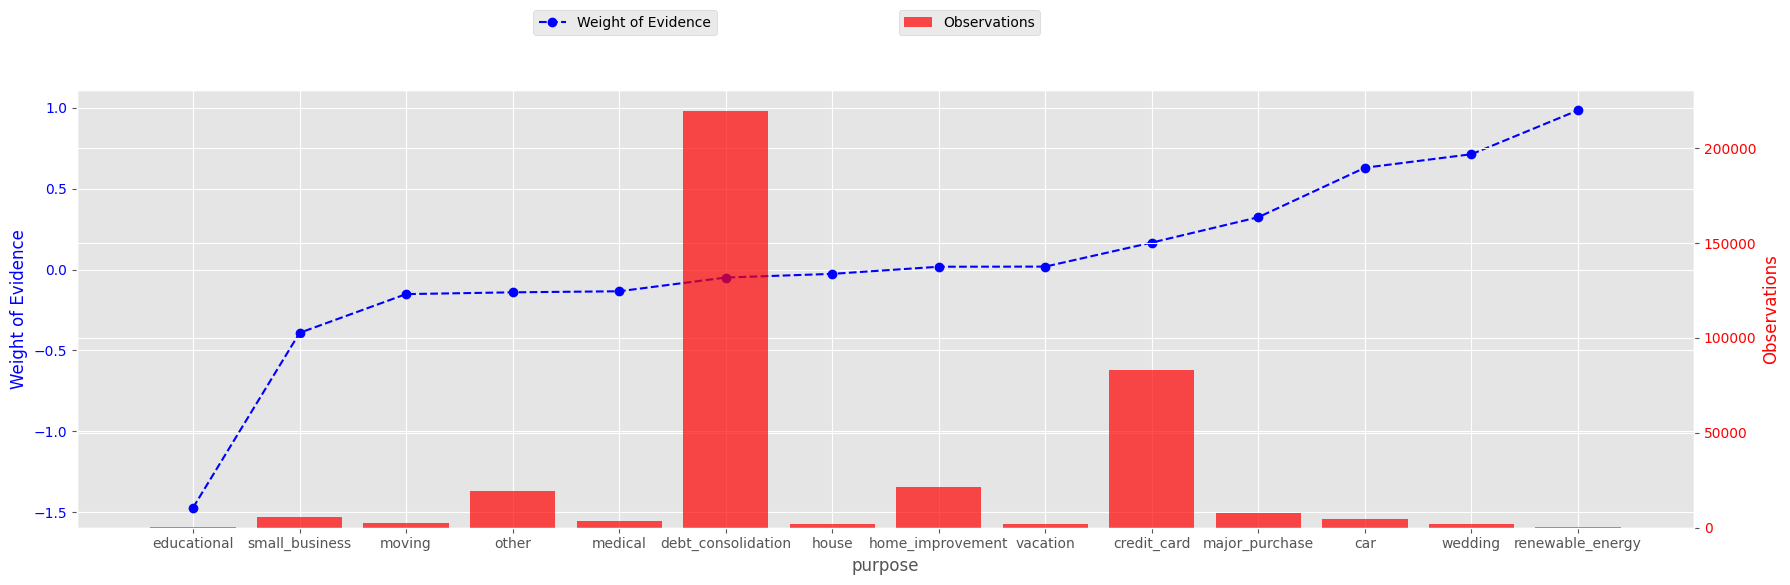


 ADDR_STATE 



,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,12,0.666667,0.000032,8.0,4.0,0.000022,0.000583,-3.284535,NaN,NaN,inf
1,IA,13,0.846154,0.000035,11.0,2.0,0.000030,0.000292,-2.272934,0.179487,1.011601,inf
2,MT,1110,0.971171,0.002976,1078.0,32.0,0.002944,0.004666,-0.460555,0.125017,1.812379,inf
3,MS,972,0.972222,0.002606,945.0,27.0,0.002581,0.003937,-0.422334,0.001051,0.038221,inf
4,TN,4814,0.976111,0.012905,4699.0,115.0,0.012833,0.016769,-0.267509,0.003889,0.154825,inf
5,HI,1973,0.976178,0.005289,1926.0,47.0,0.005260,0.006853,-0.264629,0.000067,0.002880,inf
6,NV,5175,0.976232,0.013873,5052.0,123.0,0.013797,0.017935,-0.262327,0.000053,0.002302,inf
7,SD,783,0.977011,0.002099,765.0,18.0,0.002089,0.002625,-0.228178,0.000780,0.034149,inf
8,PA,13124,0.978589,0.035182,12843.0,281.0,0.035074,0.040974,-0.155482,0.001577,0.072695,inf
9,VA,11423,0.978727,0.030622,11180.0,243.0,0.030532,0.035433,-0.148862,0.000138,0.006621,inf


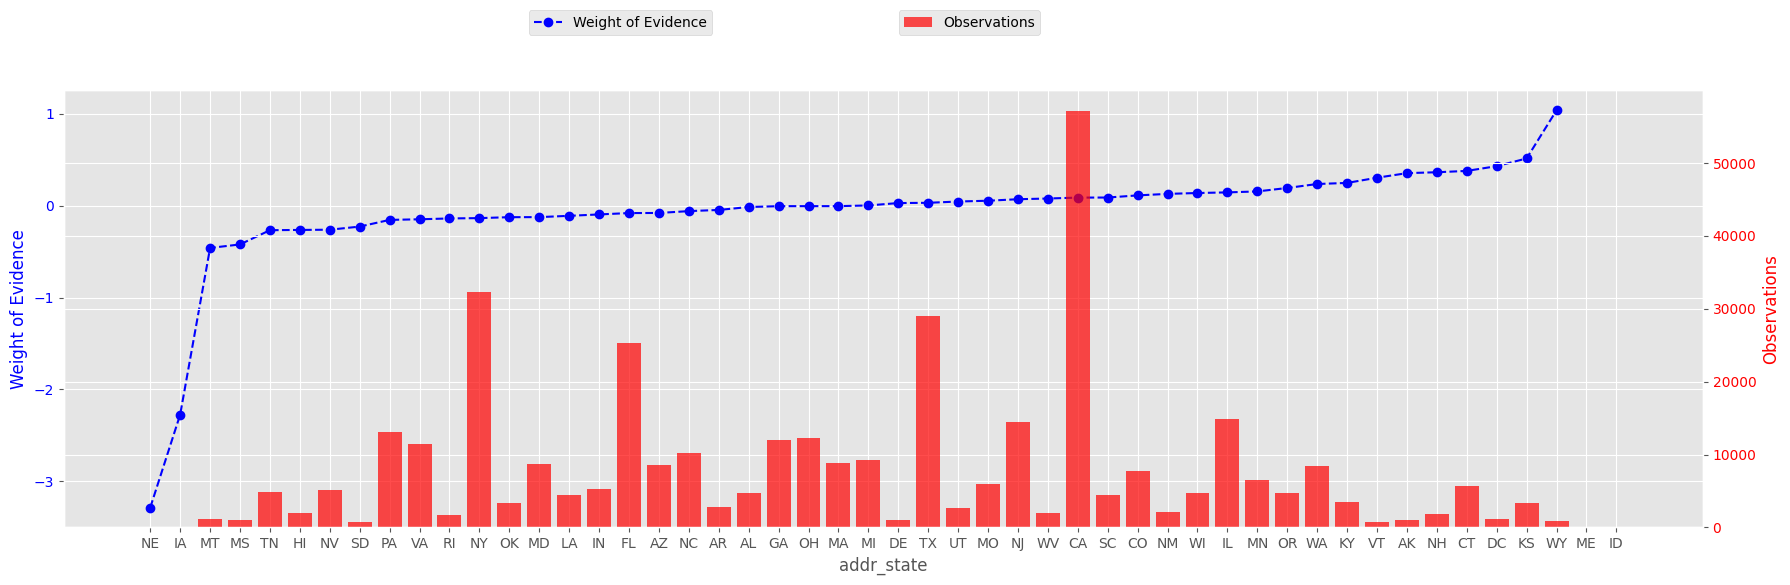


 INITIAL_LIST_STATUS 



,initial_list_status,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,w,130537,0.979309,0.349939,127836.0,2701.0,0.349117,0.393847,-0.120556,NaN,NaN,0.008577
1,f,242491,0.982857,0.650061,238334.0,4157.0,0.650883,0.606153,0.071198,0.003549,0.191753,0.008577


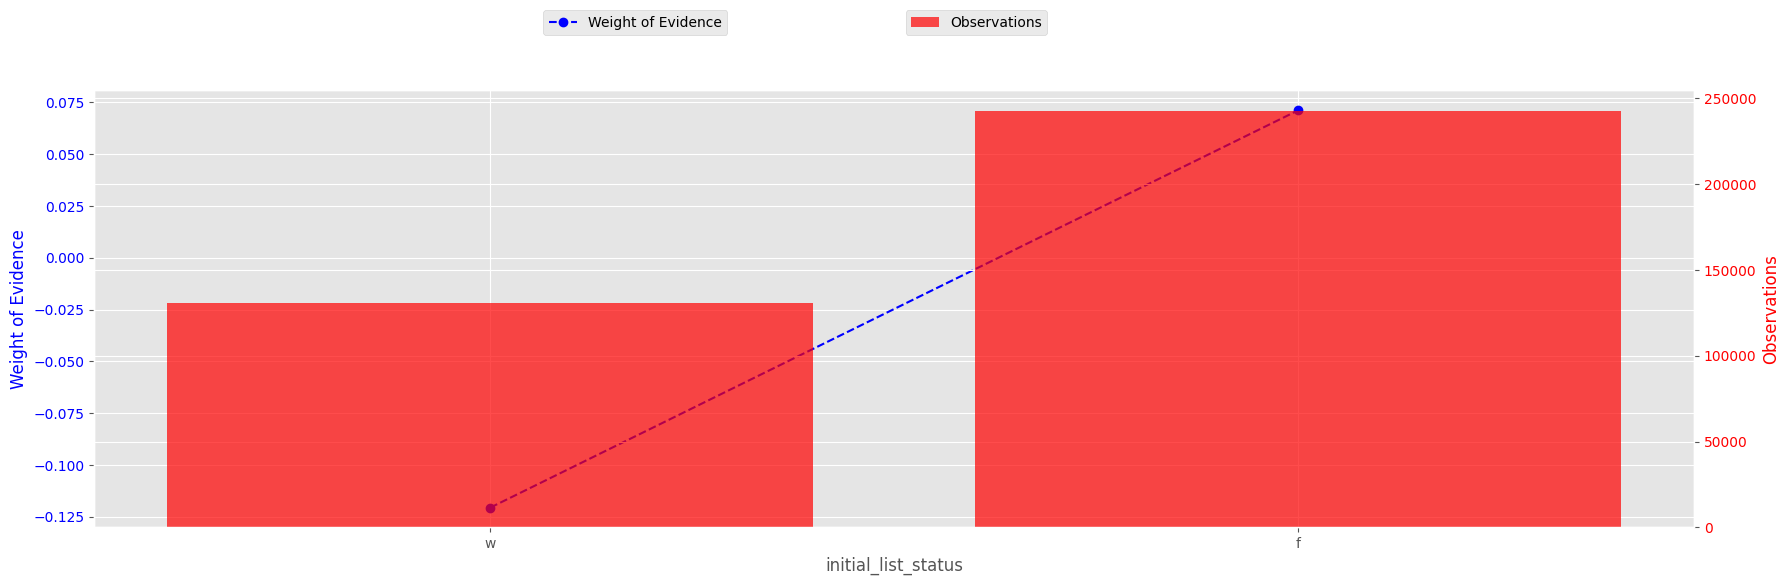

In [44]:
# create a loop to use our functinos on all the categorical columns
woe_columns = ['grade', 'home_ownership', 'verification_status','purpose', 'addr_state', 'initial_list_status']

for col in woe_columns:
    print('\n', col.upper(), '\n')
    df_temp = woe_discrete(X_train, col, y_train)
    display(df_temp)
    plot_by_woe(df_temp)

# Creating dummy variables
Using these results we will create our dummy variables. we will use the category with the lowest WoE as our reference category therfore removing it.

In [45]:
# create a new df for preprocessed inputs
df_inputs_pp = X_train.copy()

# Grade

This shows a very good patern for WoE, the better the grade the better the WoE. Therefor we will keep all the individual categories as dummy variables. <br>
The reference category will be 'grade:G'

# home_ownership variable



The categories OTHER, NONE, and ANY are underrepresented so we shouldnt creaty dummy variables for them, nor should we remove them. <br>
Therefor we will combine the categories together with the next risky category with a good number of observations, RENT.

OWN and MORTGAGE have different WoE compared to the each other and the rest, so they will have their own dummy variable.

In [46]:
df_inputs_pp['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df_inputs_pp['home_ownership:RENT'],
                                                         df_inputs_pp['home_ownership:OTHER'],
                                                         df_inputs_pp['home_ownership:NONE'],
                                                         df_inputs_pp['home_ownership:ANY']])

# addr_state variable
Note that 1 state is missing: North Dakota (ND). We will need to add this in.

In [47]:
# add ND to the dataframe if not already there.
if ['addr_state:ND'] in df_inputs_pp.columns.values:
    pass
else:
    df_inputs_pp['addr_state:ND'] = 0

Looking at the graph for WoE we see that the first 2 and last 2 states have a fairly different WoE compared to the rest. <br>
But they also have very little observations. so we will group these with the closest state/states with similar WoE. <br>
The remaining states in the centre of the graph have similar WoE, we will replot excluding the 4 outliers we identified to get a better look.

,addr_state,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,NE,12,0.666667,0.000032,8.0,4.0,0.000022,0.000583,-3.284535,NaN,NaN,inf
1,IA,13,0.846154,0.000035,11.0,2.0,0.000030,0.000292,-2.272934,0.179487,1.011601,inf
2,MT,1110,0.971171,0.002976,1078.0,32.0,0.002944,0.004666,-0.460555,0.125017,1.812379,inf
3,MS,972,0.972222,0.002606,945.0,27.0,0.002581,0.003937,-0.422334,0.001051,0.038221,inf
4,TN,4814,0.976111,0.012905,4699.0,115.0,0.012833,0.016769,-0.267509,0.003889,0.154825,inf
5,HI,1973,0.976178,0.005289,1926.0,47.0,0.005260,0.006853,-0.264629,0.000067,0.002880,inf
6,NV,5175,0.976232,0.013873,5052.0,123.0,0.013797,0.017935,-0.262327,0.000053,0.002302,inf
7,SD,783,0.977011,0.002099,765.0,18.0,0.002089,0.002625,-0.228178,0.000780,0.034149,inf
8,PA,13124,0.978589,0.035182,12843.0,281.0,0.035074,0.040974,-0.155482,0.001577,0.072695,inf
9,VA,11423,0.978727,0.030622,11180.0,243.0,0.030532,0.035433,-0.148862,0.000138,0.006621,inf


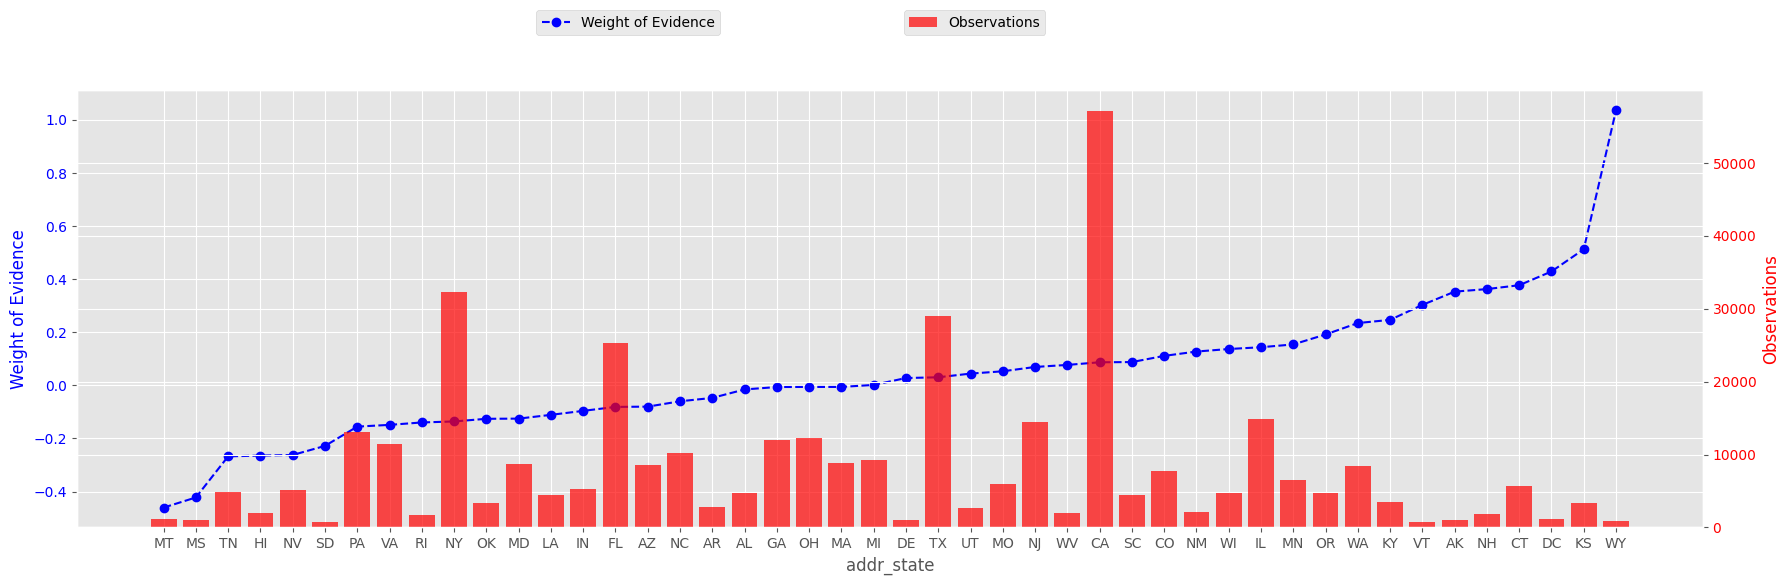

In [48]:
add_state_woe = woe_discrete(X_train, 'addr_state', y_train)
display(add_state_woe)
plot_by_woe(add_state_woe.iloc[2:-2,:])

We can better differences amongst the states now.
NE and IA have very little observations so we will group them with the next similar state. We will also assume ND is highest risk as we have no information about it, so this will also be grouped in. <br>
MT and MS also have few observations so we will group them with then next similar. <br>
The next similar state would be TN, HI, NV and SD. <br> 

Our first dummy variable will contain: **NE, IA, ND, MT, MS, TN, HI, NV and SD**

<br>
On the other end of the graph we can group WY with ID and ME, given the low number of observations we will group these with the next lowest state KS.<br>

This dummy variable will contain: **ME, ID, WY and KS**

Lets replot the remaining states

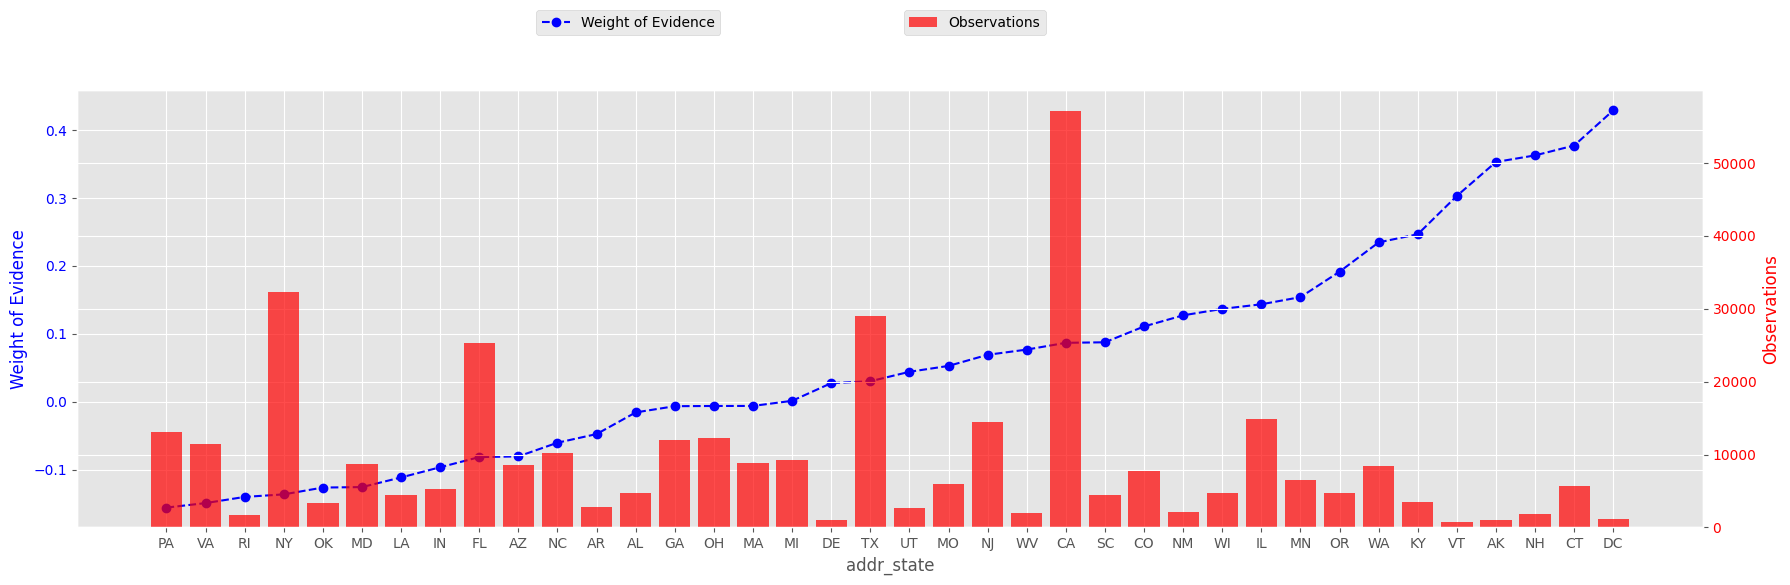

In [49]:
plot_by_woe(add_state_woe.iloc[8:-4,:])

States with a much high number of observations have their own dummy variable, so we will keep NY, FL, TX, and CA on their own and group around these states.

### The final dummy variable groups will look like:

- NE, IA, ND, MT, MS, TN, HI, NV, SD (Reference variable)
<br>
- PA, VA, RI <br>
- NY<br>
- OK, MD, LA, IN<br>
- FL<br>
- AZ, NC, AR<br>
- AL, GA, OH, MA, MI <br>
- TX<br>
- UT, MO, NJ, WV<br>
- CA<br>
- SC, CO, NM, WI, IL, MN<br>
- OR, WA, KY<br>
- VT, AK, NH, CT, DC<br>
- ME, ID, WY, KS<br>

In [50]:
# create our new dummy variable columns
df_inputs_pp['addr_state:NE_IA_ND_MT_MS_TN_HI_NV'] = sum([df_inputs_pp['addr_state:NE'],
                                                        df_inputs_pp['addr_state:IA'],
                                                        df_inputs_pp['addr_state:ND'],
                                                        df_inputs_pp['addr_state:MT'],
                                                        df_inputs_pp['addr_state:MS'],
                                                        df_inputs_pp['addr_state:TN'],
                                                        df_inputs_pp['addr_state:HI'],
                                                        df_inputs_pp['addr_state:NV']
                                                        ])

df_inputs_pp['addr_state:PA_VA_RI'] = sum([df_inputs_pp['addr_state:PA'],
                                        df_inputs_pp['addr_state:VA'],
                                        df_inputs_pp['addr_state:RI']
                                        ])

df_inputs_pp['addr_state:OK_MD_LA_IN'] = sum([df_inputs_pp['addr_state:OK'],
                                            df_inputs_pp['addr_state:MD'],
                                            df_inputs_pp['addr_state:LA'],
                                            df_inputs_pp['addr_state:IN']
                                            ])

df_inputs_pp['addr_state:AZ_NC_AR'] = sum([df_inputs_pp['addr_state:AZ'],
                                         df_inputs_pp['addr_state:NC'],
                                         df_inputs_pp['addr_state:AR']])


df_inputs_pp['addr_state:AL_GA_OH_MA_MI'] =sum([df_inputs_pp['addr_state:AL'],
                                              df_inputs_pp['addr_state:GA'],
                                              df_inputs_pp['addr_state:OH'],
                                              df_inputs_pp['addr_state:MA'],
                                              df_inputs_pp['addr_state:MI']])

df_inputs_pp['addr_state:UT_MO_NJ_WV'] = sum([df_inputs_pp['addr_state:UT'],
                                            df_inputs_pp['addr_state:MO'],
                                            df_inputs_pp['addr_state:NJ'],
                                            df_inputs_pp['addr_state:WV']])

df_inputs_pp['addr_state:SC_CO_NM_WI_IL_MN'] = sum([df_inputs_pp['addr_state:SC'],
                                                  df_inputs_pp['addr_state:CO'],
                                                  df_inputs_pp['addr_state:NM'],
                                                  df_inputs_pp['addr_state:WI'],
                                                  df_inputs_pp['addr_state:IL'],
                                                  df_inputs_pp['addr_state:MN']])

df_inputs_pp['addr_state:OR_WA_KY'] = sum([df_inputs_pp['addr_state:OR'],
                                         df_inputs_pp['addr_state:WA'],
                                         df_inputs_pp['addr_state:KY']])

df_inputs_pp['addr_state:VT_AK_NH_CT_DC'] = sum([df_inputs_pp['addr_state:VT'],
                                               df_inputs_pp['addr_state:AK'],
                                               df_inputs_pp['addr_state:NH'],
                                               df_inputs_pp['addr_state:CT'],
                                               df_inputs_pp['addr_state:DC']])

df_inputs_pp['addr_state:ME_ID_WY_KS'] = sum([df_inputs_pp['addr_state:ME'],
                                            df_inputs_pp['addr_state:ID'],
                                            df_inputs_pp['addr_state:WY'],
                                            df_inputs_pp['addr_state:KS']])

# Verification status & Initial_list_status

These variables show good paterns and thereform we will leave them as is.

# Purpose

The categories Debt_consolidation and credit_card have much more observations so we will keep them as their own dummy variable.

After grouping the rest we are left with:

- educational, small_business, moving, other, medical
- debt_consolidation
- house, home_improvement, vacation
- credit_card
- major_purchase, car, wedding, renewable_energy
    


In [51]:
df_inputs_pp['purpose:educ_sbus_moving_other_med'] = sum([df_inputs_pp['purpose:educational'],
                                                         df_inputs_pp['purpose:small_business'],
                                                         df_inputs_pp['purpose:moving'],
                                                         df_inputs_pp['purpose:other'],
                                                         df_inputs_pp['purpose:medical']
                                                         ])

df_inputs_pp['purpose:house_home_improv_vacation'] = sum([df_inputs_pp['purpose:house'],
                                                         df_inputs_pp['purpose:home_improvement'],
                                                         df_inputs_pp['purpose:vacation']
                                                         ])

df_inputs_pp['purpose:major_purch_car_wedding_ren_energy'] = sum([df_inputs_pp['purpose:major_purchase'],
                                                                 df_inputs_pp['purpose:car'],
                                                                 df_inputs_pp['purpose:wedding'],
                                                                 df_inputs_pp['purpose:renewable_energy']])


In [52]:
df_inputs_pp['term']

428248    36
206567    36
136351    36
413286    36
36242     36
          ..
259760    36
366693    36
132252    36
147222    36
122257    36
Name: term, Length: 373028, dtype: int32

# Preprocessing Continuous Variables
As these categories will now actually have a quantitative difference we will not sort them by WoE when grouping but leave them in there natural ascending order.

In [53]:
def woe_ordered_continuous(df , continuous_variable_name, good_bad_variable_df):
    
    # concat the categorical column and the target variable column
    df = pd.concat([df[continuous_variable_name], good_bad_variable_df],
                   axis=1)
    # create 2 columns by grouping by the categorical value and calculating the count and the mean(which is the percentage in this case)
    df = pd.concat([df.groupby(df.columns.values[0], as_index = False)[df.columns.values[1]].count(),
                   df.groupby(df.columns.values[0], as_index=False)[df.columns.values[1]].mean()], axis=1)
    # drop the duplicate column
    df = df.iloc[:, [0,1,3]]
    # rename the columns
    df.columns = [df.columns.values[0], 'n_obs', 'prop_good']
    # calculate the proportion of observations per category
    df['prop_n_obs'] = df['n_obs'] / df['n_obs'].sum()
    # calculate the number of good observations
    df['n_good'] = df['prop_good'] * df['n_obs']
    # calculate the number of bad observations
    df['n_bad'] = (1 - df['prop_good']) * df['n_obs']
    # calculate proportion of good observations per category, compared to the total number of observations across all categories 
    df['prop_n_good'] = df['n_good'] / df['n_good'].sum()
    # calculate proportion of bad observations per category, compared to the total number of observations across all categories 
    df['prop_n_bad'] = df['n_bad'] / df['n_bad'].sum()
    # calculate WoE using the formula above
    df['WoE'] = np.log(df['prop_n_good'] / df['prop_n_bad'])
    # calculate the good proportions difference compared to the previous row
    df['diff_prop_good'] = df['prop_good'].diff().abs()
    # calculate the WoE difference compared to the previous row
    df['diff_WoE'] = df["WoE"].diff().abs()
    # Calculate the information value for the variable
    df['IV'] = (df['prop_n_good'] - df['prop_n_bad']) * df['WoE']
    df['IV'] = df['IV'].sum()
    
    return df
    

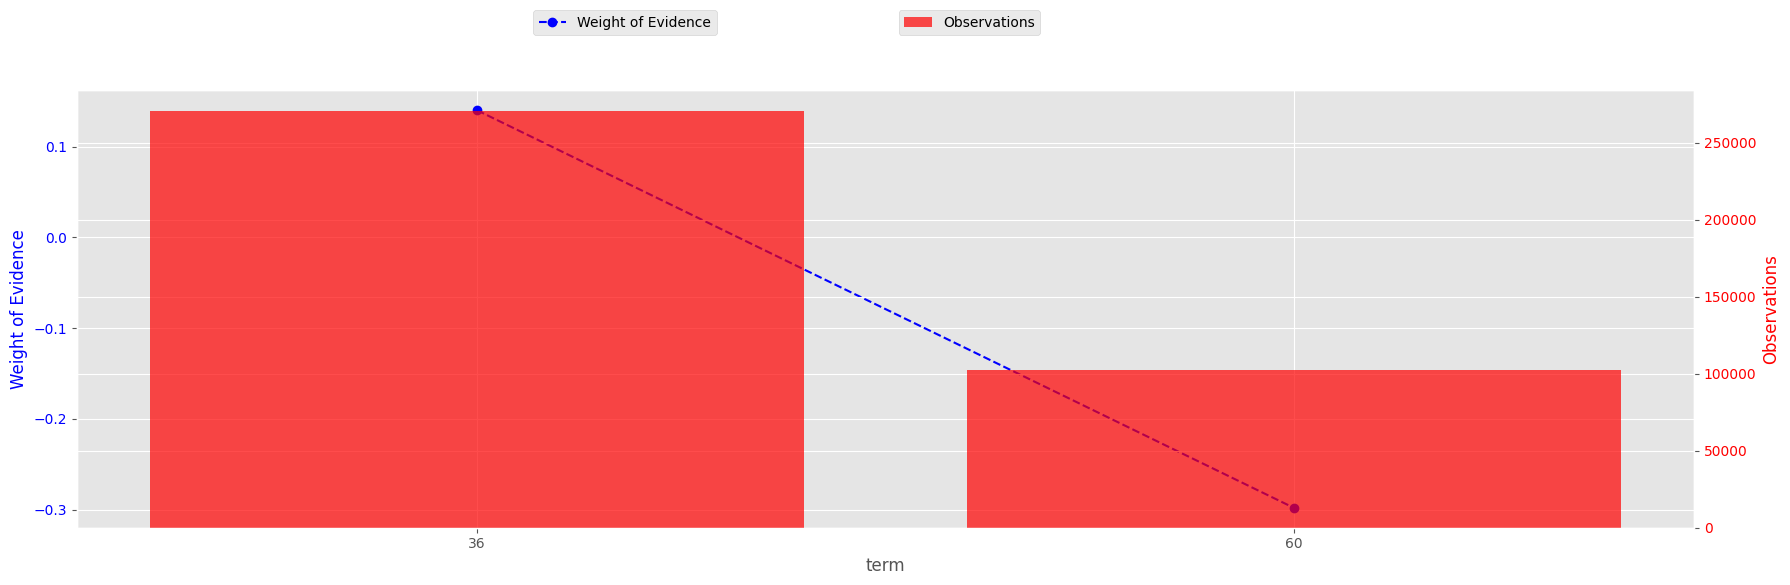

In [54]:
df_temp = woe_ordered_continuous(df_inputs_pp, 'term', y_train)
plot_by_woe(df_temp)

we will create 2 new columns one for each category.

In [55]:
df_inputs_pp['terms:36'] = np.where((df_inputs_pp['term'] == 36), 1, 0)
df_inputs_pp['terms:60'] = np.where((df_inputs_pp['term'] == 60), 1, 0)

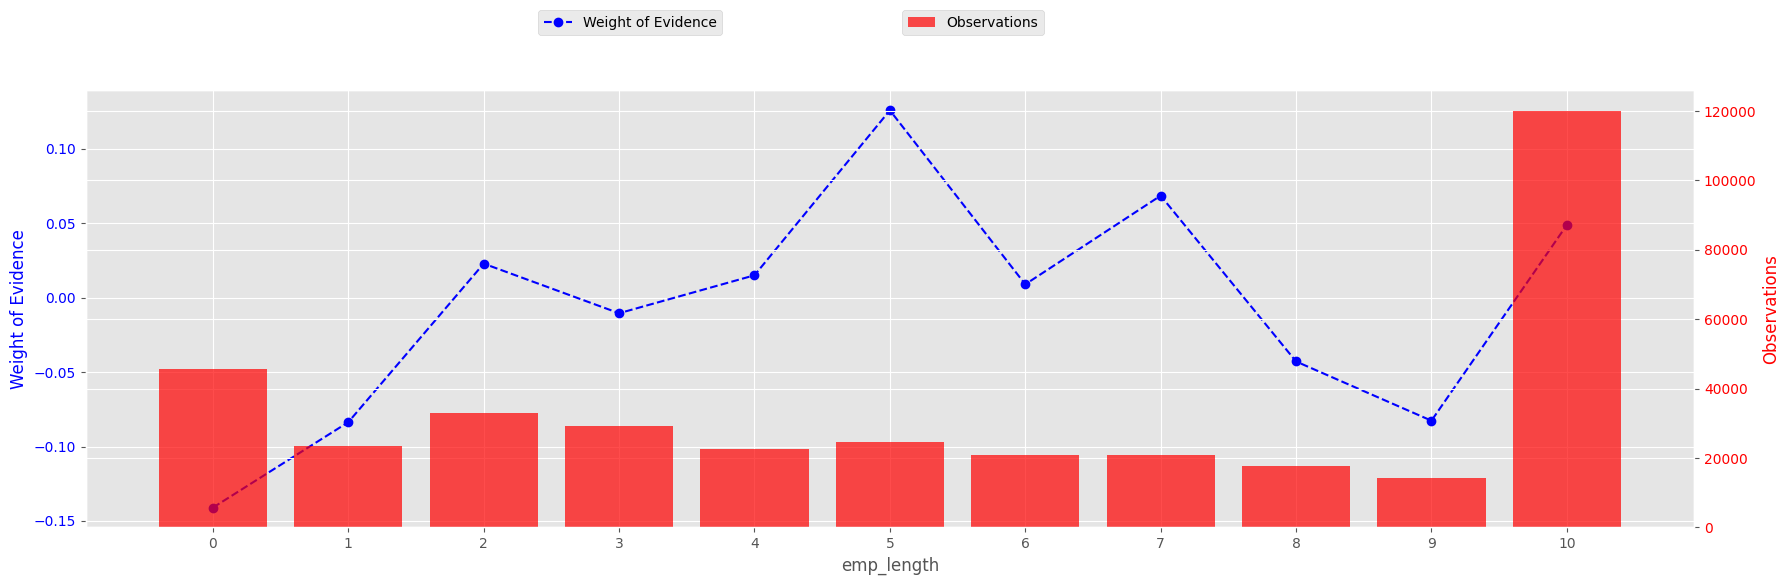

In [56]:
df_temp = woe_ordered_continuous(df_inputs_pp, 'emp_length', y_train)
plot_by_woe(df_temp)

Based on this graph we will make the following groups:
- 0
- 1
- 2, 3, 4
- 5
- 6, 7
- 8, 9
- 10

In [57]:
df_inputs_pp['emp_length:0'] = np.where(df_inputs_pp['emp_length'].isin([0]), 1, 0)
df_inputs_pp['emp_length:1'] = np.where(df_inputs_pp['emp_length'].isin([1]), 1, 0)
df_inputs_pp['emp_length:2-4'] = np.where(df_inputs_pp['emp_length'].isin([2,3,4]), 1, 0)
df_inputs_pp['emp_length:5'] = np.where(df_inputs_pp['emp_length'].isin([5]), 1, 0)
df_inputs_pp['emp_length:6-7'] = np.where(df_inputs_pp['emp_length'].isin([6,7]), 1, 0)
df_inputs_pp['emp_length:8-9'] = np.where(df_inputs_pp['emp_length'].isin([8,9]), 1, 0)
df_inputs_pp['emp_length:10'] = np.where(df_inputs_pp['emp_length'].isin([10]), 1, 0)


# mths_since_issue_d

In [58]:
len(df_inputs_pp['mths_since_issue_d'].unique())

91

We will perform fine classing by grouping these categories into variables, then use coarse classing to determine the final categories.

In [59]:
df_inputs_pp['mths_since_issue_d_factor'] = pd.cut(df_inputs_pp['mths_since_issue_d'], 40)
df_inputs_pp['mths_since_issue_d_factor']

428248      (42.75, 45.0]
206567      (63.0, 65.25]
136351      (54.0, 56.25]
413286      (42.75, 45.0]
36242     (101.25, 103.5]
               ...       
259760     (35.91, 38.25]
366693      (40.5, 42.75]
132252      (51.75, 54.0]
147222      (54.0, 56.25]
122257      (51.75, 54.0]
Name: mths_since_issue_d_factor, Length: 373028, dtype: category
Categories (40, interval[float64, right]): [(35.91, 38.25] < (38.25, 40.5] < (40.5, 42.75] < (42.75, 45.0] ... (117.0, 119.25] < (119.25, 121.5] < (121.5, 123.75] < (123.75, 126.0]]

In [60]:
df_temp = woe_ordered_continuous(df_inputs_pp, 'mths_since_issue_d_factor', y_train)
df_temp

,mths_since_issue_d_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(35.91, 38.25]",59276,0.974880,0.158905,57787.0,1489.0,0.157815,0.217119,-0.319023,NaN,NaN,0.36327
1,"(38.25, 40.5]",23643,0.976568,0.063381,23089.0,554.0,0.063055,0.080782,-0.247735,0.001688,0.071288,0.36327
2,"(40.5, 42.75]",37292,0.976805,0.099971,36427.0,865.0,0.099481,0.126130,-0.237346,0.000237,0.010389,0.36327
3,"(42.75, 45.0]",43616,0.977394,0.116924,42630.0,986.0,0.116421,0.143774,-0.211025,0.000589,0.026321,0.36327
4,"(45.0, 47.25]",24661,0.979482,0.066110,24155.0,506.0,0.065967,0.073782,-0.111972,0.002088,0.099053,0.36327
5,"(47.25, 49.5]",23714,0.982458,0.063572,23298.0,416.0,0.063626,0.060659,0.047756,0.002976,0.159728,0.36327
6,"(49.5, 51.75]",21599,0.983333,0.057902,21239.0,360.0,0.058003,0.052493,0.099809,0.000875,0.052053,0.36327
7,"(51.75, 54.0]",28536,0.986193,0.076498,28142.0,394.0,0.076855,0.057451,0.290986,0.002860,0.191177,0.36327
8,"(54.0, 56.25]",15799,0.986392,0.042353,15584.0,215.0,0.042559,0.031350,0.305680,0.000199,0.014695,0.36327
9,"(56.25, 58.5]",12674,0.989506,0.033976,12541.0,133.0,0.034249,0.019393,0.568728,0.003115,0.263047,0.36327


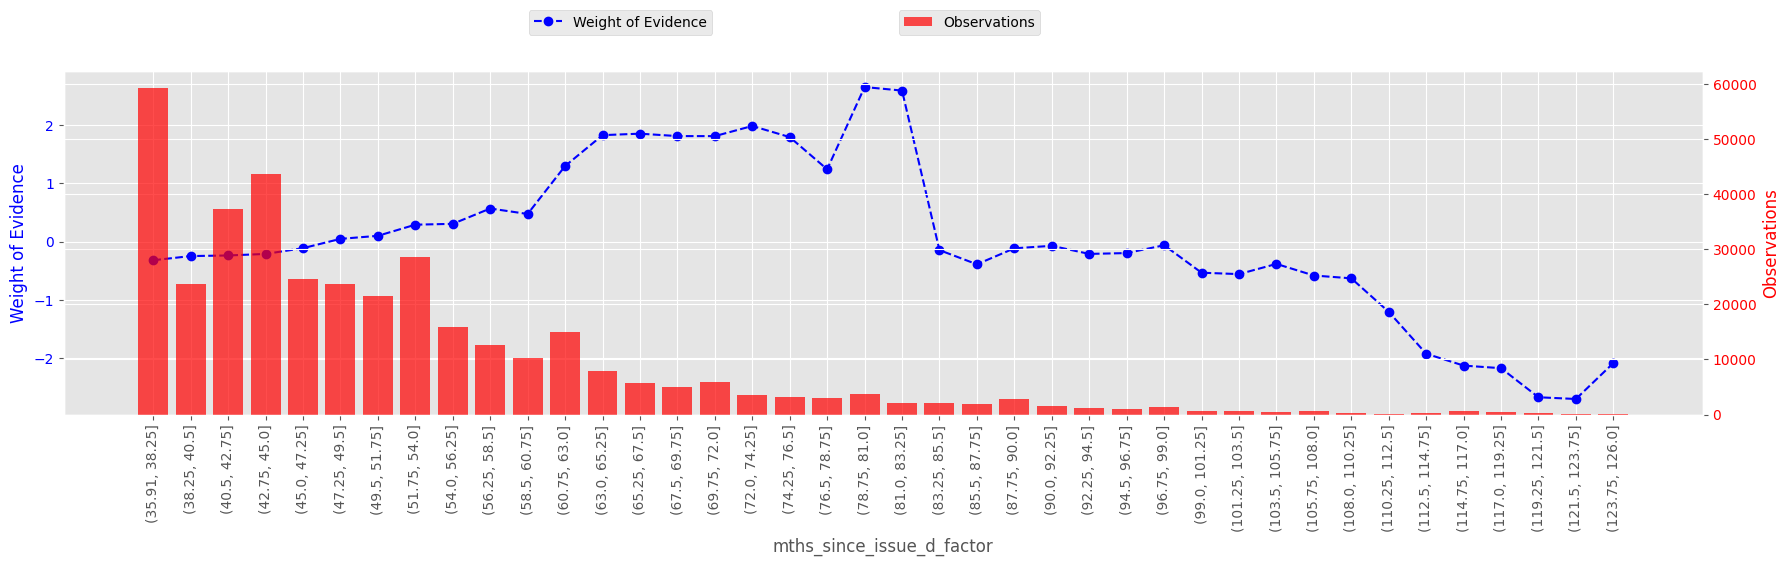

In [61]:
plot_by_woe(df_temp, 90)

In [62]:
# Group as following
df_inputs_pp['mths_since_issue_d:<38'] = np.where(df_inputs_pp['mths_since_issue_d'].isin(range(38)),1,0)
df_inputs_pp['mths_since_issue_d:38-47'] = np.where(df_inputs_pp['mths_since_issue_d'].isin(range(38,48)),1,0)
df_inputs_pp['mths_since_issue_d:48-51'] = np.where(df_inputs_pp['mths_since_issue_d'].isin(range(48,51)),1,0)
df_inputs_pp['mths_since_issue_d:52-56'] = np.where(df_inputs_pp['mths_since_issue_d'].isin(range(52,57)),1,0)
df_inputs_pp['mths_since_issue_d:57-60'] = np.where(df_inputs_pp['mths_since_issue_d'].isin(range(57,61)),1,0)
df_inputs_pp['mths_since_issue_d:60-83'] = np.where(df_inputs_pp['mths_since_issue_d'].isin(range(60,84)),1,0)
df_inputs_pp['mths_since_issue_d:>84'] = np.where((df_inputs_pp['mths_since_issue_d'] > 84),1,0)
                                                    

# int_rate

In [63]:
df_inputs_pp['int_rate_factor'] = pd.cut(df_inputs_pp['int_rate'], 50)
df_temp = woe_ordered_continuous(df_inputs_pp, 'int_rate_factor', y_train)
df_temp

,int_rate_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(5.399, 5.833]",789,1.000000,0.002115,789.0,0.0,0.002155,0.000000,inf,NaN,NaN,inf
1,"(5.833, 6.246]",8450,0.997988,0.022652,8433.0,17.0,0.023030,0.002479,2.229013,0.002012,inf,inf
2,"(6.246, 6.658]",7877,0.995684,0.021116,7843.0,34.0,0.021419,0.004958,1.463334,0.002305,0.765678,inf
3,"(6.658, 7.071]",1848,0.998918,0.004954,1846.0,2.0,0.005041,0.000292,2.849947,0.003234,1.386613,inf
4,"(7.071, 7.484]",3192,0.994361,0.008557,3174.0,18.0,0.008668,0.002625,1.194694,0.004557,1.655253,inf
5,"(7.484, 7.897]",12745,0.995057,0.034166,12682.0,63.0,0.034634,0.009186,1.327122,0.000696,0.132428,inf
6,"(7.897, 8.31]",9658,0.994616,0.025891,9606.0,52.0,0.026234,0.007582,1.241218,0.000441,0.085905,inf
7,"(8.31, 8.722]",6639,0.988854,0.017798,6565.0,74.0,0.017929,0.010790,0.507761,0.005762,0.733457,inf
8,"(8.722, 9.135]",9543,0.994027,0.025583,9486.0,57.0,0.025906,0.008311,1.136839,0.005173,0.629078,inf
9,"(9.135, 9.548]",6631,0.988689,0.017776,6556.0,75.0,0.017904,0.010936,0.492966,0.005338,0.643873,inf


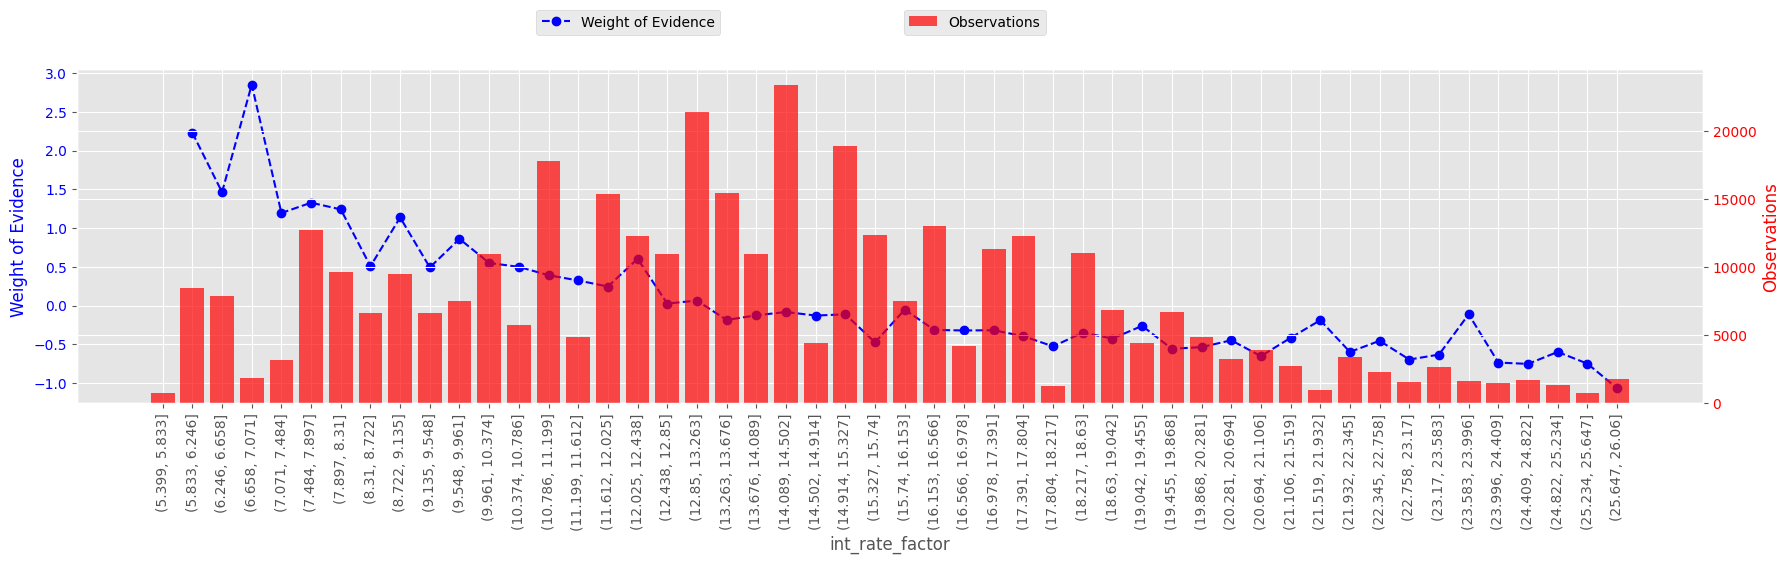

In [64]:
plot_by_woe(df_temp, 90)

In [65]:
# Group the int_rate column as follows
df_inputs_pp['int_rate:<8.31'] = np.where((df_inputs_pp['int_rate'] <= 8.31),1,0)
df_inputs_pp['int_rate:8.31-9.961'] = np.where((df_inputs_pp['int_rate'] > 8.31) & (df_inputs_pp['int_rate'] <= 9.961),1,0)
df_inputs_pp['int_rate:9.961-12.025'] = np.where((df_inputs_pp['int_rate'] > 9.961) & (df_inputs_pp['int_rate'] <= 12.025),1,0)
df_inputs_pp['int_rate:12.025-15.327'] = np.where((df_inputs_pp['int_rate'] > 12.025) & (df_inputs_pp['int_rate'] <= 15.327),1,0)
df_inputs_pp['int_rate:15.327-19.455'] = np.where((df_inputs_pp['int_rate'] > 15.327) & (df_inputs_pp['int_rate'] <= 19.455),1,0)
df_inputs_pp['int_rate:19.455-23.583'] = np.where((df_inputs_pp['int_rate'] > 19.455) & (df_inputs_pp['int_rate'] <= 23.583),1,0)
df_inputs_pp['int_rate:>23.583'] = np.where((df_inputs_pp['int_rate'] > 23.583),1,0)

# funded_amnt

,funded_amnt_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(465.5, 1190.0]",1237,0.979790,0.003316,1212.0,25.0,0.003310,0.003645,-0.096531,NaN,NaN,0.020568
1,"(1190.0, 1880.0]",3075,0.988943,0.008243,3041.0,34.0,0.008305,0.004958,0.515899,0.009153,0.612430,0.020568
2,"(1880.0, 2570.0]",5991,0.986146,0.016060,5908.0,83.0,0.016135,0.012103,0.287540,0.002797,0.228359,0.020568
3,"(2570.0, 3260.0]",7218,0.986561,0.019350,7121.0,97.0,0.019447,0.014144,0.318411,0.000415,0.030870,0.020568
4,"(3260.0, 3950.0]",4813,0.983171,0.012903,4732.0,81.0,0.012923,0.011811,0.089972,0.003391,0.228438,0.020568
5,"(3950.0, 4640.0]",9090,0.983938,0.024368,8944.0,146.0,0.024426,0.021289,0.137450,0.000768,0.047478,0.020568
6,"(4640.0, 5330.0]",15930,0.982800,0.042705,15656.0,274.0,0.042756,0.039953,0.067800,0.001139,0.069650,0.020568
7,"(5330.0, 6020.0]",17207,0.985471,0.046128,16957.0,250.0,0.046309,0.036454,0.239293,0.002671,0.171494,0.020568
8,"(6020.0, 6710.0]",6877,0.984441,0.018436,6770.0,107.0,0.018489,0.015602,0.169746,0.001030,0.069548,0.020568
9,"(6710.0, 7400.0]",11768,0.981900,0.031547,11555.0,213.0,0.031556,0.031059,0.015900,0.002541,0.153846,0.020568


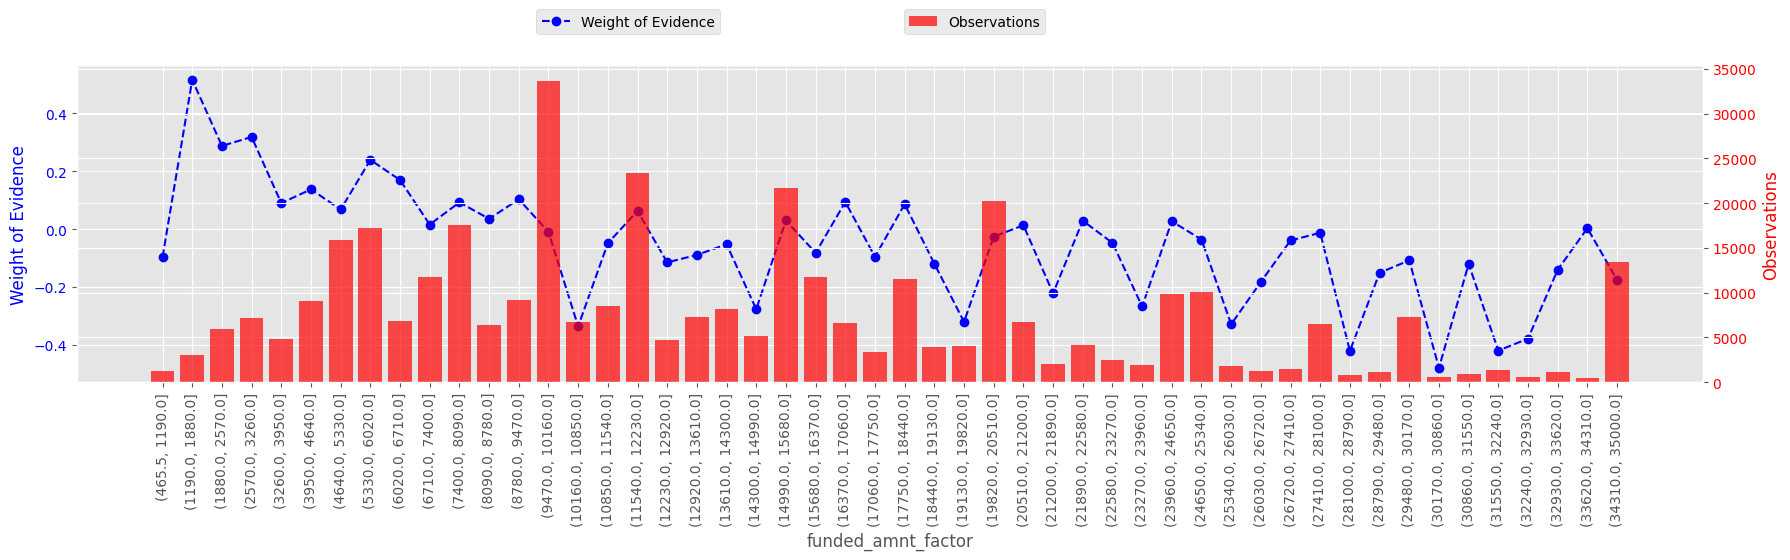

In [66]:
df_inputs_pp['funded_amnt_factor'] = pd.cut(df_inputs_pp['funded_amnt'], 50)
df_temp = woe_ordered_continuous(df_inputs_pp, 'funded_amnt_factor', y_train)
display(df_temp)
plot_by_woe(df_temp, 90)

Lookings at the WoE for this variable we see that there is no clear pattern and gives us good reason to exclude from our model.

# mths_since_earliest_cr_line

,mths_since_earliest_cr_line_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.887, 17.74]",25,0.920000,0.000067,23.0,2.0,0.000063,0.000292,-1.535335,NaN,NaN,inf
1,"(17.74, 35.48]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
2,"(35.48, 53.22]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
3,"(53.22, 70.96]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
4,"(70.96, 88.7]",1819,0.977460,0.004876,1778.0,41.0,0.004856,0.005978,-0.208010,NaN,NaN,inf
5,"(88.7, 106.44]",3942,0.971588,0.010568,3830.0,112.0,0.010460,0.016331,-0.445561,0.005872,0.237551,inf
6,"(106.44, 124.18]",10002,0.977205,0.026813,9774.0,228.0,0.026693,0.033246,-0.219546,0.005617,0.226014,inf
7,"(124.18, 141.92]",16676,0.977393,0.044704,16299.0,377.0,0.044512,0.054972,-0.211068,0.000188,0.008478,inf
8,"(141.92, 159.66]",21823,0.980525,0.058502,21398.0,425.0,0.058437,0.061971,-0.058718,0.003132,0.152350,inf
9,"(159.66, 177.4]",27750,0.978847,0.074391,27163.0,587.0,0.074181,0.085593,-0.143096,0.001678,0.084377,inf


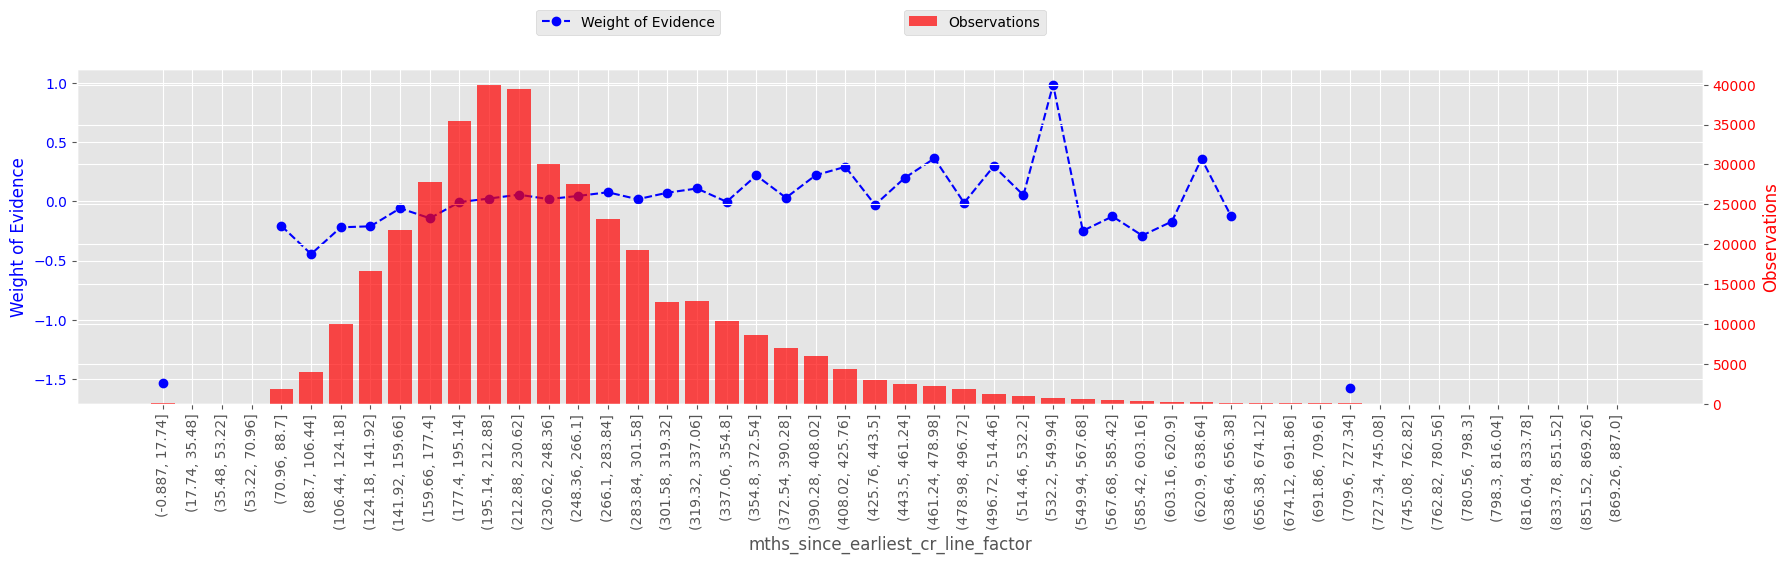

In [67]:
df_inputs_pp['mths_since_earliest_cr_line_factor'] = pd.cut(df_inputs_pp['mths_since_earliest_cr_line'], 50)
df_temp = woe_ordered_continuous(df_inputs_pp, 'mths_since_earliest_cr_line_factor', y_train)
display(df_temp)
plot_by_woe(df_temp, 90)

In [68]:
df_inputs_pp['mths_since_earliest_cr_line:<106'] = np.where((df_inputs_pp['mths_since_earliest_cr_line'] <= 106),1,0)
df_inputs_pp['mths_since_earliest_cr_line:107-141'] = np.where(df_inputs_pp['mths_since_earliest_cr_line'].isin(range(107,142)),1,0)
df_inputs_pp['mths_since_earliest_cr_line:142-177'] = np.where(df_inputs_pp['mths_since_earliest_cr_line'].isin(range(142,178)),1,0)
df_inputs_pp['mths_since_earliest_cr_line:178-354'] = np.where(df_inputs_pp['mths_since_earliest_cr_line'].isin(range(178,355)),1,0)
df_inputs_pp['mths_since_earliest_cr_line:>354'] = np.where((df_inputs_pp['mths_since_earliest_cr_line'] >= 354),1,0)

# installment

,installment_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(14.276, 43.556]",1858,0.984392,0.004981,1829.0,29.0,0.004995,0.004229,0.166547,NaN,NaN,inf
1,"(43.556, 71.443]",4839,0.988014,0.012972,4781.0,58.0,0.013057,0.008457,0.434280,0.003622,0.267733,inf
2,"(71.443, 99.329]",6814,0.987672,0.018267,6730.0,84.0,0.018379,0.012248,0.405832,0.000342,0.028448,inf
3,"(99.329, 127.216]",9154,0.984488,0.024540,9012.0,142.0,0.024612,0.020706,0.172803,0.003185,0.233028,inf
4,"(127.216, 155.102]",10150,0.985025,0.027210,9998.0,152.0,0.027304,0.022164,0.208578,0.000537,0.035775,inf
5,"(155.102, 182.988]",16821,0.982819,0.045093,16532.0,289.0,0.045148,0.042141,0.068945,0.002206,0.139633,inf
6,"(182.988, 210.875]",17150,0.985481,0.045975,16901.0,249.0,0.046156,0.036308,0.239993,0.002662,0.171049,inf
7,"(210.875, 238.761]",14951,0.985553,0.040080,14735.0,216.0,0.040241,0.031496,0.245021,0.000072,0.005027,inf
8,"(238.761, 266.648]",18911,0.981016,0.050696,18552.0,359.0,0.050665,0.052348,-0.032671,0.004536,0.277692,inf
9,"(266.648, 294.534]",20060,0.980409,0.053776,19667.0,393.0,0.053710,0.057305,-0.064794,0.000608,0.032123,inf


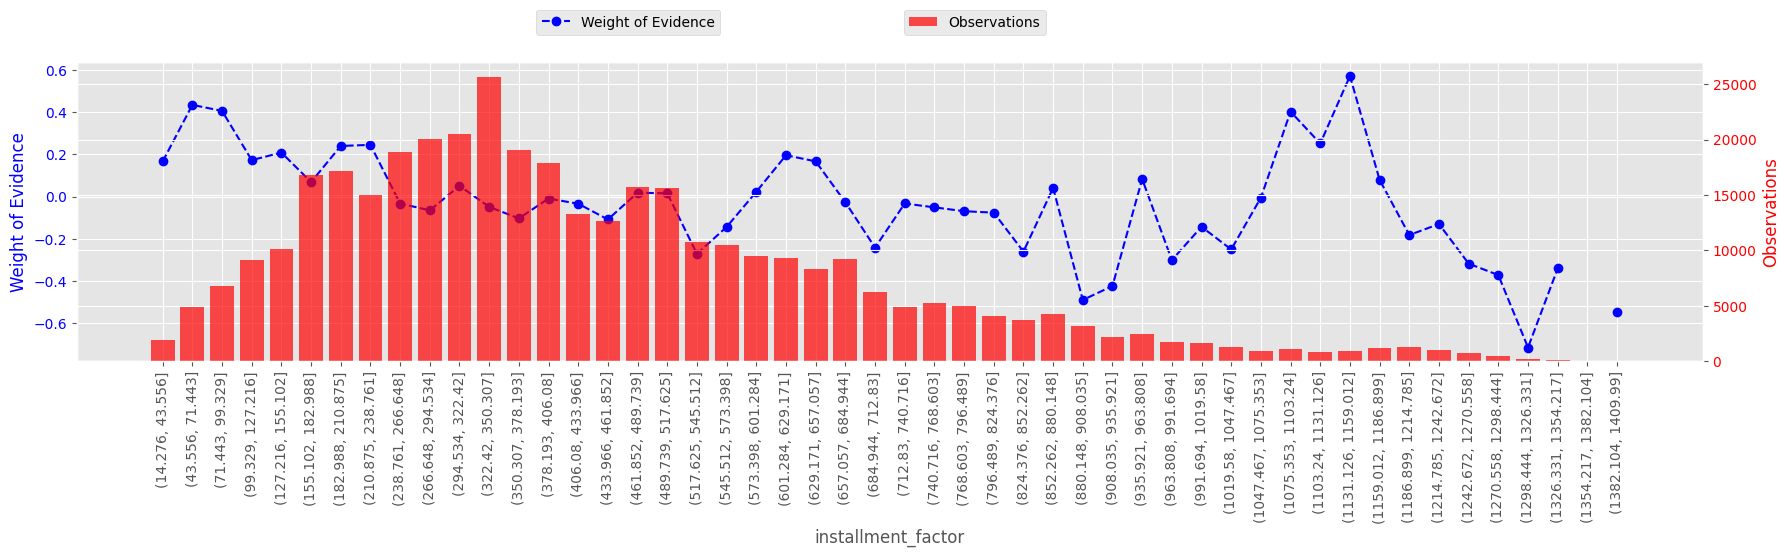

In [69]:
df_inputs_pp['installment_factor'] = pd.cut(df_inputs_pp['installment'], 50)
df_temp = woe_ordered_continuous(df_inputs_pp, 'installment_factor', y_train)
display(df_temp)
plot_by_woe(df_temp, 90)

Quite alot of variance so we wont include this variable in our model

# delinq_2yrs

In [70]:
len(df_inputs_pp['delinq_2yrs'].unique())

24

C:\Users\tberv\anaconda3\envs\credit_risk\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,delinq_2yrs,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,306407,0.982474,0.821405,301037.0,5370.0,0.822124,0.783027,0.048723,NaN,NaN,inf
1,1.0,44886,0.979103,0.120329,43948.0,938.0,0.120021,0.136775,-0.130669,0.003372,0.179393,inf
2,2.0,13061,0.975117,0.035013,12736.0,325.0,0.034782,0.047390,-0.309319,0.003986,0.178650,inf
3,3.0,4574,0.973546,0.012262,4453.0,121.0,0.012161,0.017644,-0.372139,0.001571,0.062820,inf
4,4.0,1928,0.977697,0.005169,1885.0,43.0,0.005148,0.006270,-0.197199,0.004151,0.174940,inf
5,5.0,1008,0.980159,0.002702,988.0,20.0,0.002698,0.002916,-0.077731,0.002462,0.119467,inf
6,6.0,511,0.966732,0.001370,494.0,17.0,0.001349,0.002479,-0.608360,0.013427,0.530628,inf
7,7.0,274,0.974453,0.000735,267.0,7.0,0.000729,0.001021,-0.336343,0.007721,0.272016,inf
8,8.0,129,0.953488,0.000346,123.0,6.0,0.000336,0.000875,-0.957257,0.020964,0.620914,inf
9,9.0,90,0.966667,0.000241,87.0,3.0,0.000238,0.000437,-0.610386,0.013178,0.346871,inf


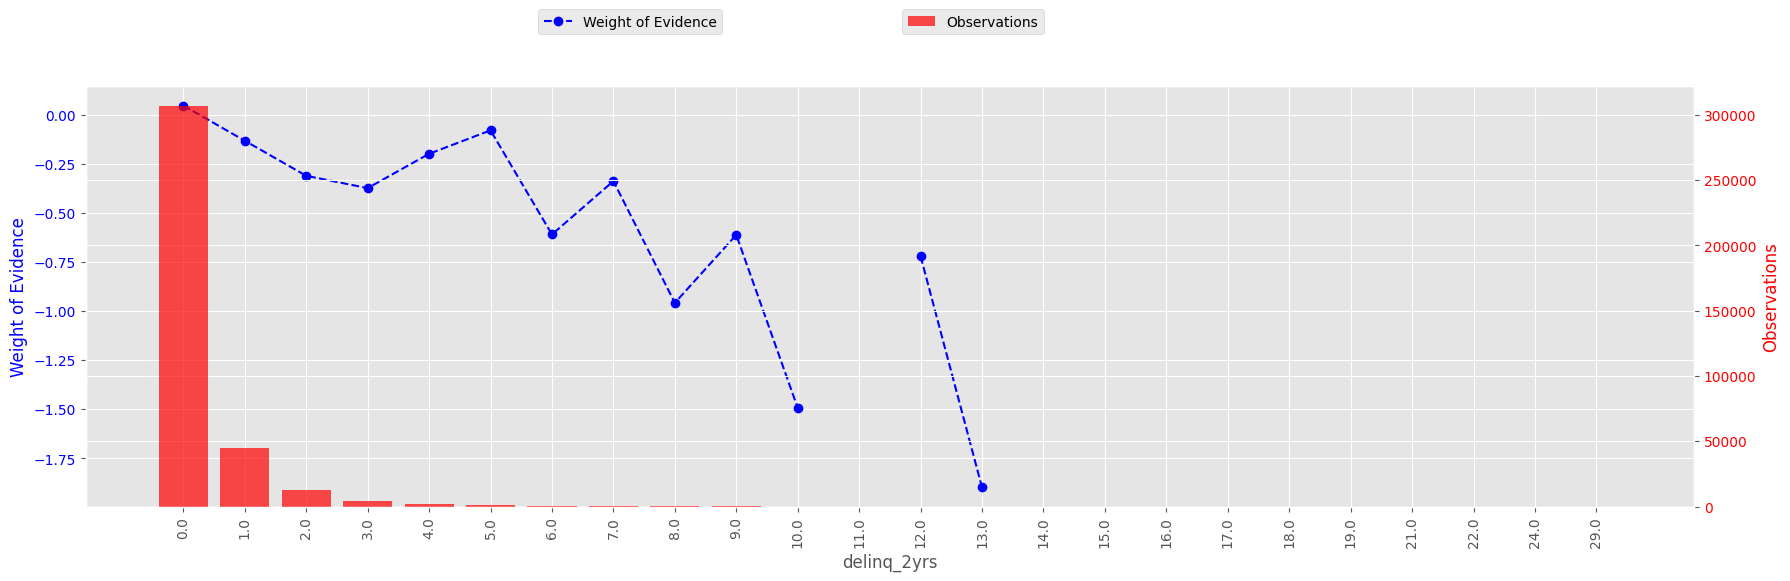

In [71]:
df_temp = woe_ordered_continuous(df_inputs_pp, 'delinq_2yrs', y_train)
display(df_temp)
plot_by_woe(df_temp, 90)

In [72]:
df_inputs_pp['delinq_2yrs:0'] = np.where((df_inputs_pp['delinq_2yrs'] == 0), 1, 0)
df_inputs_pp['delinq_2yrs:1-3'] = np.where((df_inputs_pp['delinq_2yrs'] >= 1) & (df_inputs_pp['delinq_2yrs'] <= 3), 1, 0)
df_inputs_pp['delinq_2yrs:>=4'] = np.where((df_inputs_pp['delinq_2yrs'] >= 9), 1, 0)

# inq_last_6mths

In [73]:
len(df_inputs_pp['inq_last_6mths'].unique())

24

C:\Users\tberv\anaconda3\envs\credit_risk\lib\site-packages\pandas\core\arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


,inq_last_6mths,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,193203,0.984322,0.517932,190174.0,3029.0,0.519360,0.441674,0.162025,NaN,NaN,inf
1,1.0,104140,0.981573,0.279175,102221.0,1919.0,0.279163,0.279819,-0.002349,0.002749,0.164374,inf
2,2.0,46237,0.980708,0.123950,45345.0,892.0,0.123836,0.130067,-0.049093,0.000865,0.046744,inf
3,3.0,20079,0.980427,0.053827,19686.0,393.0,0.053762,0.057305,-0.063828,0.000281,0.014736,inf
4,4.0,5826,0.955201,0.015618,5565.0,261.0,0.015198,0.038058,-0.917950,0.025226,0.854122,inf
5,5.0,2224,0.929406,0.005962,2067.0,157.0,0.005645,0.022893,-1.400074,0.025794,0.482124,inf
6,6.0,941,0.905420,0.002523,852.0,89.0,0.002327,0.012978,-1.718732,0.023987,0.318658,inf
7,7.0,163,0.717791,0.000437,117.0,46.0,0.000320,0.006707,-3.044149,0.187628,1.325418,inf
8,8.0,98,0.632653,0.000263,62.0,36.0,0.000169,0.005249,-3.434066,0.085138,0.389917,inf
9,9.0,42,0.666667,0.000113,28.0,14.0,0.000076,0.002041,-3.284535,0.034014,0.149532,inf


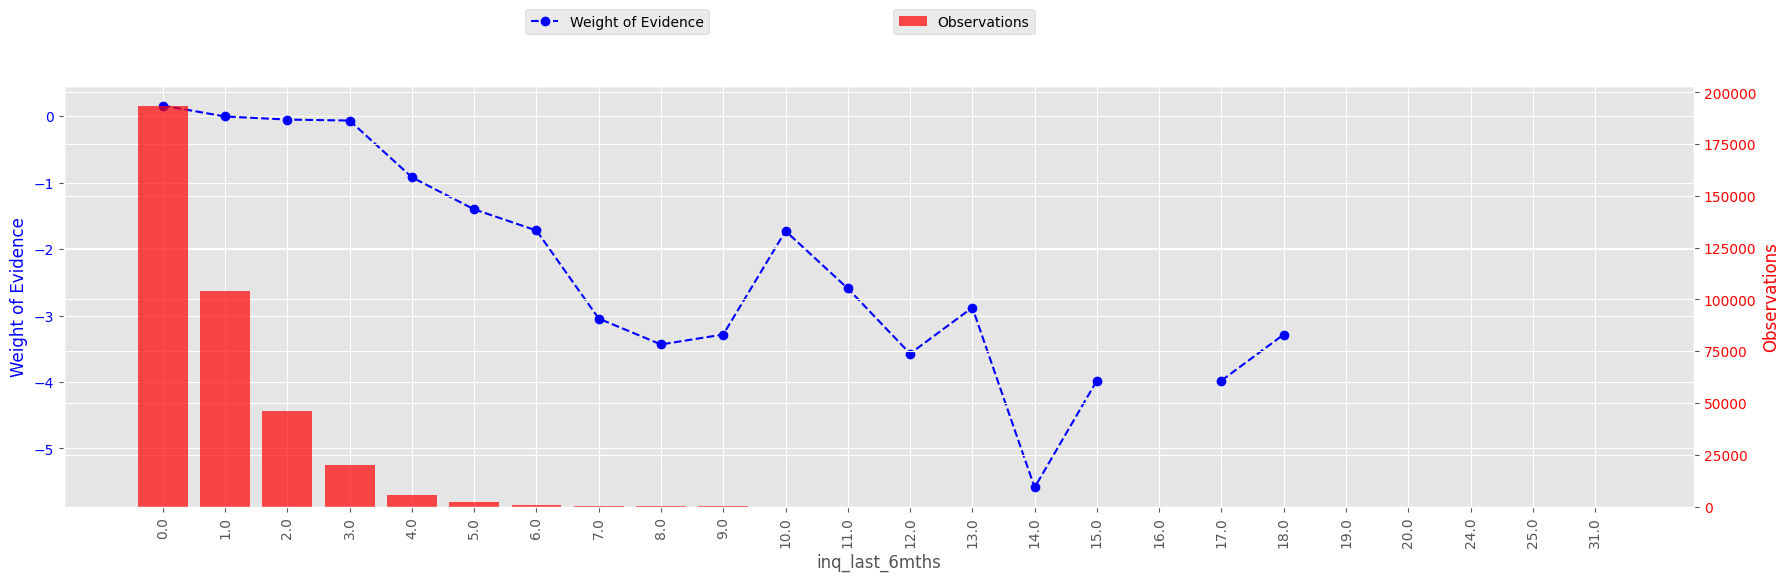

In [74]:
df_temp = woe_ordered_continuous(df_inputs_pp, 'inq_last_6mths', y_train)
display(df_temp)
plot_by_woe(df_temp, 90)

In [75]:
df_inputs_pp['inq_last_6mths:0'] = np.where((df_inputs_pp['inq_last_6mths'] == 0), 1, 0)
df_inputs_pp['inq_last_6mths:1-3'] = np.where((df_inputs_pp['inq_last_6mths'] >= 1) & (df_inputs_pp['inq_last_6mths'] <= 3), 1, 0)
df_inputs_pp['inq_last_6mths:4-6'] = np.where((df_inputs_pp['inq_last_6mths'] >= 4) & (df_inputs_pp['inq_last_6mths'] <= 6), 1, 0)
df_inputs_pp['inq_last_6mths:>6'] = np.where((df_inputs_pp['inq_last_6mths'] > 6), 1, 0)

# open_acc

In [76]:
len(df_inputs_pp['open_acc'].unique())

62

,open_acc,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,28,0.892857,0.000075,25.0,3.0,0.000068,0.000437,-1.857418,NaN,NaN,inf
1,1.0,117,0.914530,0.000314,107.0,10.0,0.000292,0.001458,-1.607438,0.021673,0.249980,inf
2,2.0,1445,0.978547,0.003874,1414.0,31.0,0.003862,0.004520,-0.157491,0.064017,1.449947,inf
3,3.0,4474,0.983460,0.011994,4400.0,74.0,0.012016,0.010790,0.107613,0.004913,0.265104,inf
4,4.0,10072,0.986398,0.027001,9935.0,137.0,0.027132,0.019977,0.306156,0.002938,0.198544,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
57,61.0,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf
58,62.0,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf
59,75.0,1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,0.000000,NaN,inf
60,76.0,2,0.500000,0.000005,1.0,1.0,0.000003,0.000146,-3.977682,0.500000,inf,inf


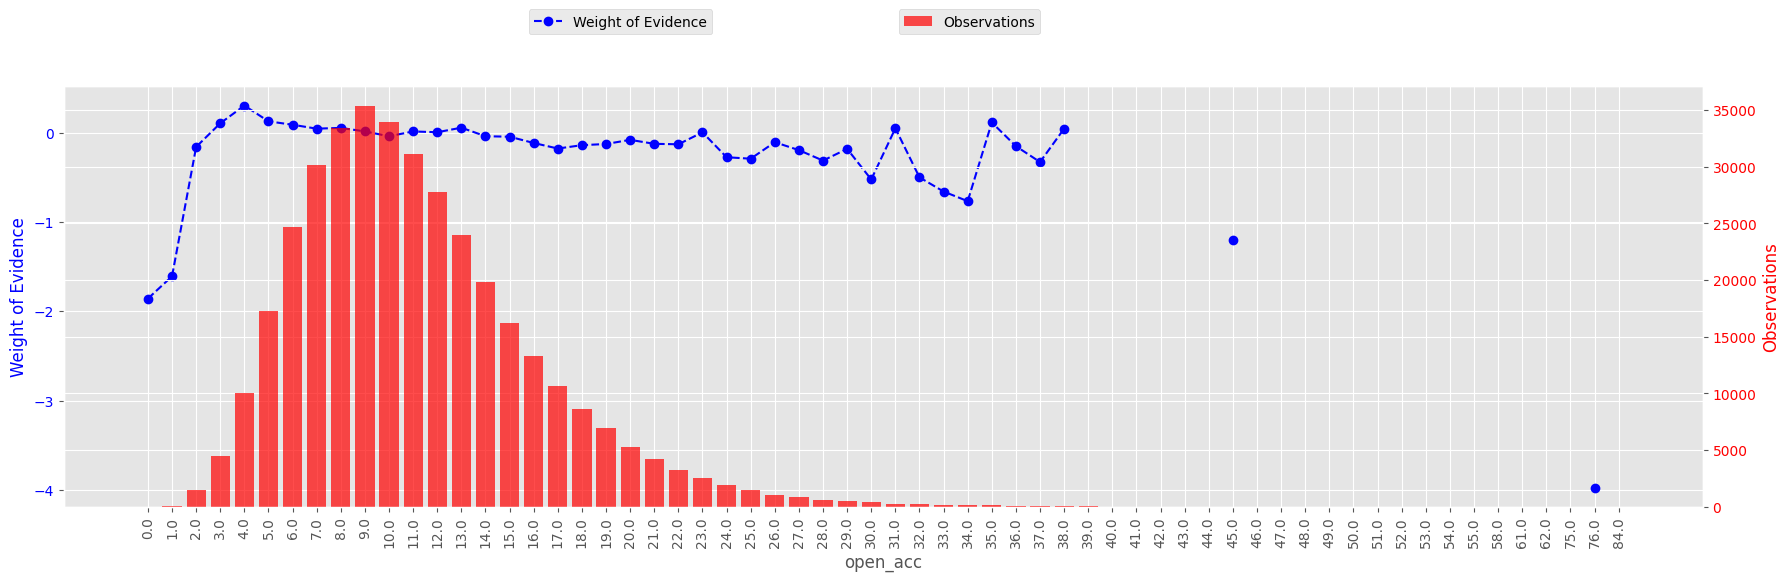

In [77]:
df_temp = woe_ordered_continuous(df_inputs_pp, 'open_acc', y_train)
display(df_temp)
plot_by_woe(df_temp, 90)

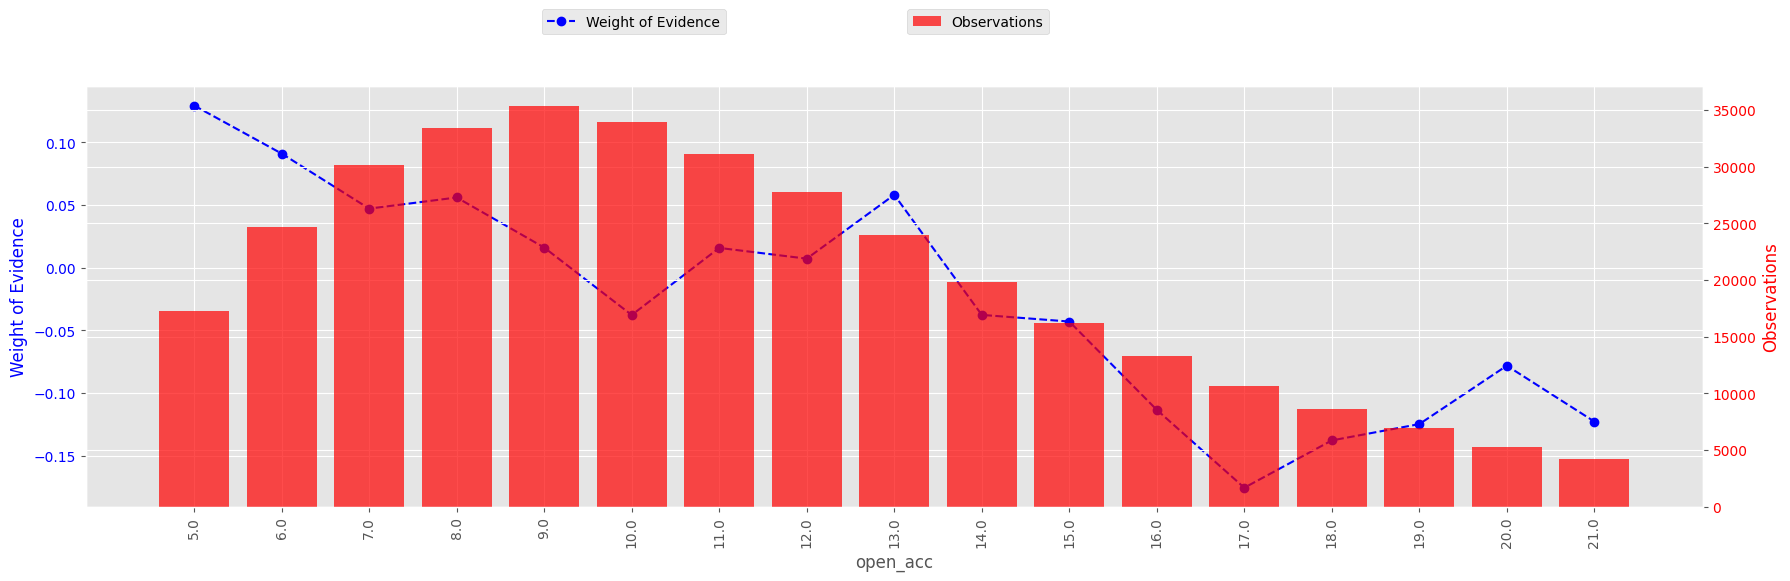

In [78]:
plot_by_woe(df_temp.iloc[5: 22,], 90)

In [79]:
df_inputs_pp['open_acc:0-4'] = np.where((df_inputs_pp['open_acc'] < 5), 1, 0)
df_inputs_pp['open_acc:5-13'] = np.where((df_inputs_pp['open_acc'] >= 5) & (df_inputs_pp['open_acc'] <= 13), 1, 0)
df_inputs_pp['open_acc:14-22'] = np.where((df_inputs_pp['open_acc'] >= 14) & (df_inputs_pp['open_acc'] <= 22), 1, 0)
df_inputs_pp['open_acc:23-25'] = np.where((df_inputs_pp['open_acc'] >= 23) & (df_inputs_pp['open_acc'] <= 25), 1, 0)
df_inputs_pp['open_acc:>25'] = np.where((df_inputs_pp['open_acc'] > 25), 1, 0)

# pub_rec

In [80]:
len(df_inputs_pp['pub_rec'].unique())

24

,pub_rec,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,323911,0.982180,0.868329,318139.0,5772.0,0.868829,0.841645,0.031788,NaN,NaN,inf
1,1.0,42499,0.977811,0.113930,41556.0,943.0,0.113488,0.137504,-0.191951,0.004369,0.223739,inf
2,2.0,4505,0.978690,0.012077,4409.0,96.0,0.012041,0.013998,-0.150627,0.000879,0.041324,inf
3,3.0,1278,0.973396,0.003426,1244.0,34.0,0.003397,0.004958,-0.377955,0.005294,0.227328,inf
4,4.0,397,0.987406,0.001064,392.0,5.0,0.001071,0.000729,0.384142,0.014010,0.762097,inf
5,5.0,213,0.981221,0.000571,209.0,4.0,0.000571,0.000583,-0.021642,0.006185,0.405784,inf
6,6.0,104,0.980769,0.000279,102.0,2.0,0.000279,0.000292,-0.045856,0.000451,0.024214,inf
7,7.0,52,1.000000,0.000139,52.0,0.0,0.000142,0.000000,inf,0.019231,inf,inf
8,8.0,24,0.958333,0.000064,23.0,1.0,0.000063,0.000146,-0.842188,0.041667,inf,inf
9,9.0,14,0.928571,0.000038,13.0,1.0,0.000036,0.000146,-1.412732,0.029762,0.570545,inf


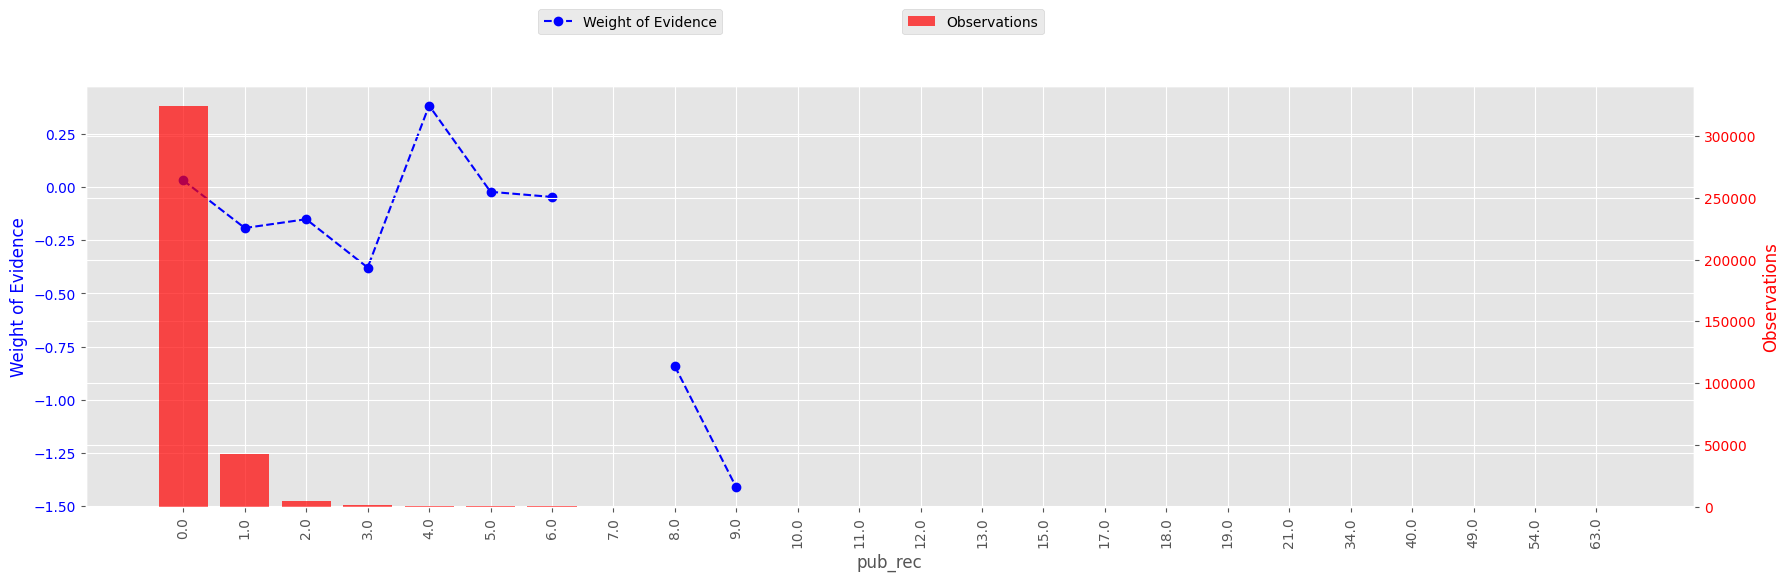

In [81]:
df_temp = woe_ordered_continuous(df_inputs_pp, 'pub_rec', y_train)
display(df_temp)
plot_by_woe(df_temp, 90)

In [82]:
df_inputs_pp['pub_rec:0-2'] = np.where((df_inputs_pp['pub_rec'] >= 0) & (df_inputs_pp['pub_rec'] <= 2), 1, 0)
df_inputs_pp['pub_rec:3-4'] = np.where((df_inputs_pp['pub_rec'] >= 3) & (df_inputs_pp['pub_rec'] <= 4), 1, 0)
df_inputs_pp['pub_rec:>=5'] = np.where((df_inputs_pp['pub_rec'] >= 5), 1, 0)

# total_acc

In [83]:
len(df_inputs_pp['total_acc'].unique())

109

,total_acc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.15, 3.0]",472,0.932203,0.001265,440.0,32.0,0.001202,0.004666,-1.356643,NaN,NaN,inf
1,"(3.0, 6.0]",6029,0.981423,0.016162,5917.0,112.0,0.016159,0.016331,-0.010596,0.049220,1.346047,inf
2,"(6.0, 9.0]",15010,0.980213,0.040238,14713.0,297.0,0.040181,0.043307,-0.074927,0.001210,0.064331,inf
3,"(9.0, 12.0]",25246,0.981502,0.067679,24779.0,467.0,0.067671,0.068096,-0.006259,0.001289,0.068668,inf
4,"(12.0, 15.0]",33443,0.979906,0.089653,32771.0,672.0,0.089497,0.097988,-0.090641,0.001596,0.084382,inf
5,"(15.0, 18.0]",39038,0.982043,0.104652,38337.0,701.0,0.104697,0.102216,0.023981,0.002137,0.114622,inf
6,"(18.0, 21.0]",40643,0.982506,0.108954,39932.0,711.0,0.109053,0.103675,0.050579,0.000463,0.026598,inf
7,"(21.0, 24.0]",40188,0.982333,0.107735,39478.0,710.0,0.107813,0.103529,0.040552,0.000173,0.010027,inf
8,"(24.0, 27.0]",36193,0.981405,0.097025,35520.0,673.0,0.097004,0.098134,-0.011576,0.000928,0.052128,inf
9,"(27.0, 30.0]",31582,0.983662,0.084664,31066.0,516.0,0.084840,0.075241,0.120081,0.002256,0.131657,inf


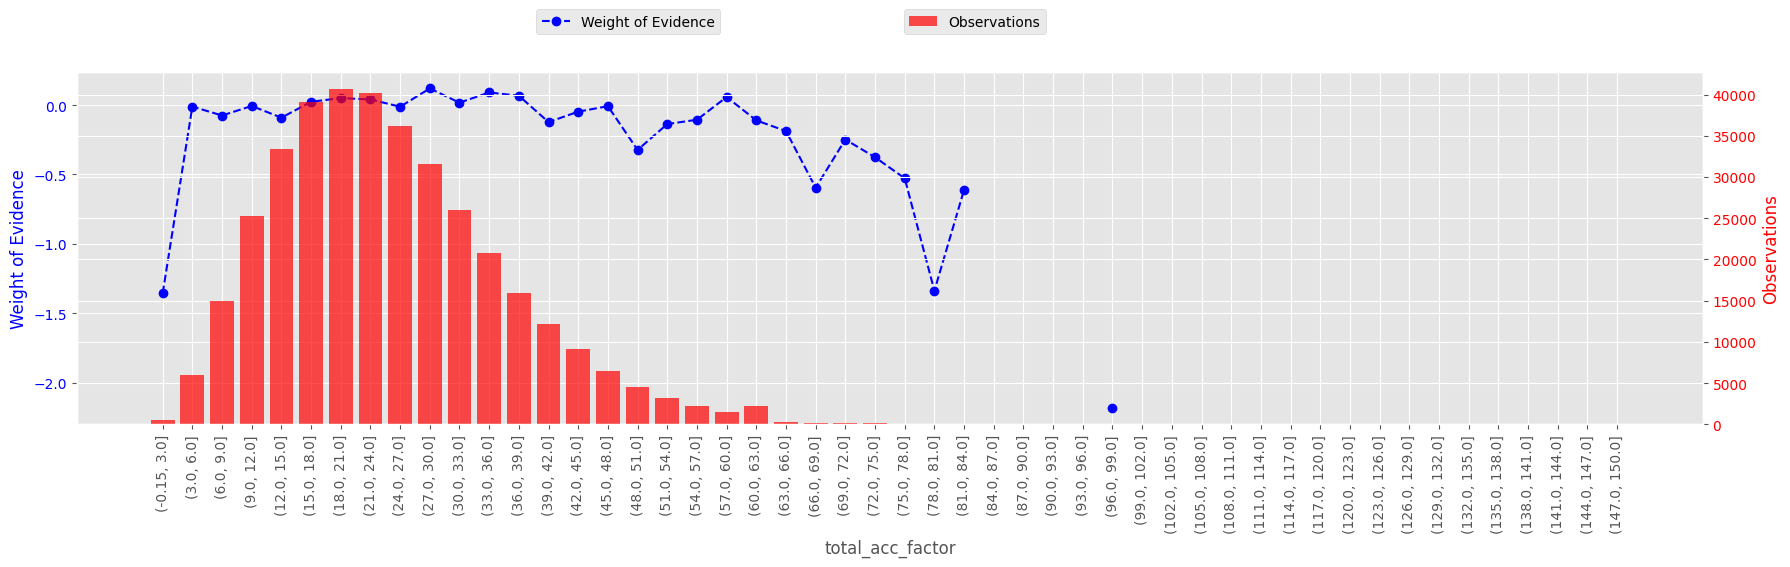

In [84]:
df_inputs_pp['total_acc_factor'] = pd.cut(df_inputs_pp['total_acc'], 50)
df_temp = woe_ordered_continuous(df_inputs_pp, 'total_acc_factor', y_train)
display(df_temp)
plot_by_woe(df_temp, 90)

In [85]:
df_inputs_pp['total_acc:<=27'] = np.where((df_inputs_pp['total_acc'] <= 27), 1, 0)
df_inputs_pp['total_acc:28-51'] = np.where((df_inputs_pp['total_acc'] >= 28) & (df_inputs_pp['total_acc'] <= 48), 1, 0)
df_inputs_pp['total_acc:>=52'] = np.where((df_inputs_pp['total_acc'] >= 49), 1, 0)

# acc_now_delinq

In [86]:
len(df_inputs_pp['acc_now_delinq'].unique())

6

,acc_now_delinq,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,0.0,371653,0.981639,0.996314,364829.0,6824.0,0.996338,0.995042,0.001301,NaN,NaN,inf
1,1.0,1286,0.975117,0.003447,1254.0,32.0,0.003425,0.004666,-0.309324,0.006522,0.310625,inf
2,2.0,74,0.972973,0.000198,72.0,2.0,0.000197,0.000292,-0.394163,0.002144,0.084839,inf
3,3.0,10,1.000000,0.000027,10.0,0.0,0.000027,0.000000,inf,0.027027,inf,inf
4,4.0,3,1.000000,0.000008,3.0,0.0,0.000008,0.000000,inf,0.000000,NaN,inf
5,5.0,2,1.000000,0.000005,2.0,0.0,0.000005,0.000000,inf,0.000000,NaN,inf


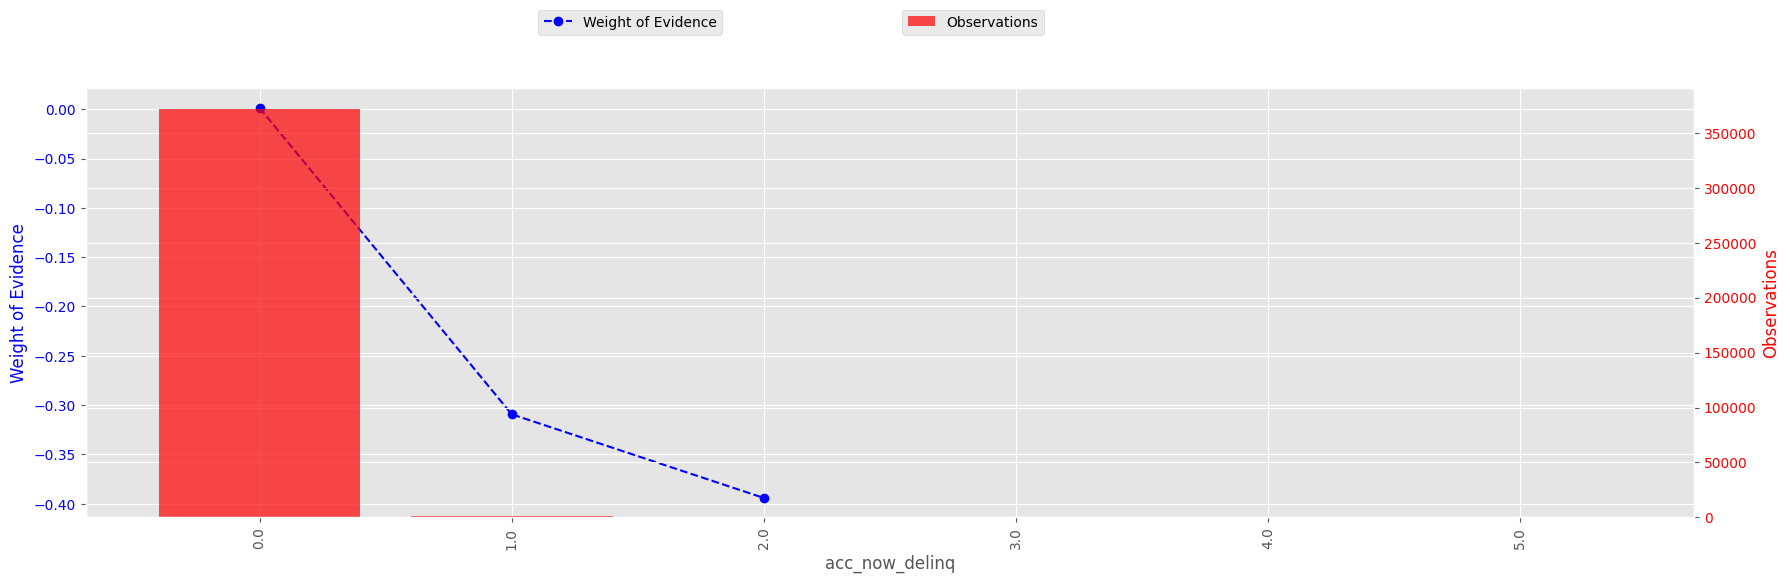

In [87]:
df_temp = woe_ordered_continuous(df_inputs_pp, 'acc_now_delinq', y_train)
display(df_temp)
plot_by_woe(df_temp, 90)

In [88]:
df_inputs_pp['acc_now_delinq:0'] = np.where((df_inputs_pp['acc_now_delinq'] == 0), 1, 0)
df_inputs_pp['acc_now_delinq:>0'] = np.where((df_inputs_pp['acc_now_delinq'] > 0), 1, 0)

# Annual_inc

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-5498.0, 76980.0]",245278,0.980202,0.657532,240422.0,4856.0,0.656586,0.708078,-0.075501,NaN,NaN,inf
1,"(76980.0, 151960.0]",111447,0.984432,0.298763,109712.0,1735.0,0.299620,0.252989,0.169169,0.004230,0.244671,inf
2,"(151960.0, 226940.0]",11889,0.984524,0.031872,11705.0,184.0,0.031966,0.026830,0.175154,0.000091,0.005984,inf
3,"(226940.0, 301920.0]",2832,0.980932,0.007592,2778.0,54.0,0.007587,0.007874,-0.037179,0.003591,0.212333,inf
4,"(301920.0, 376900.0]",681,0.973568,0.001826,663.0,18.0,0.001811,0.002625,-0.371279,0.007364,0.334099,inf
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(7125100.0, 7200080.0]",1,1.000000,0.000003,1.0,0.0,0.000003,0.000000,inf,NaN,NaN,inf
96,"(7200080.0, 7275060.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
97,"(7275060.0, 7350040.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf
98,"(7350040.0, 7425020.0]",0,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,inf


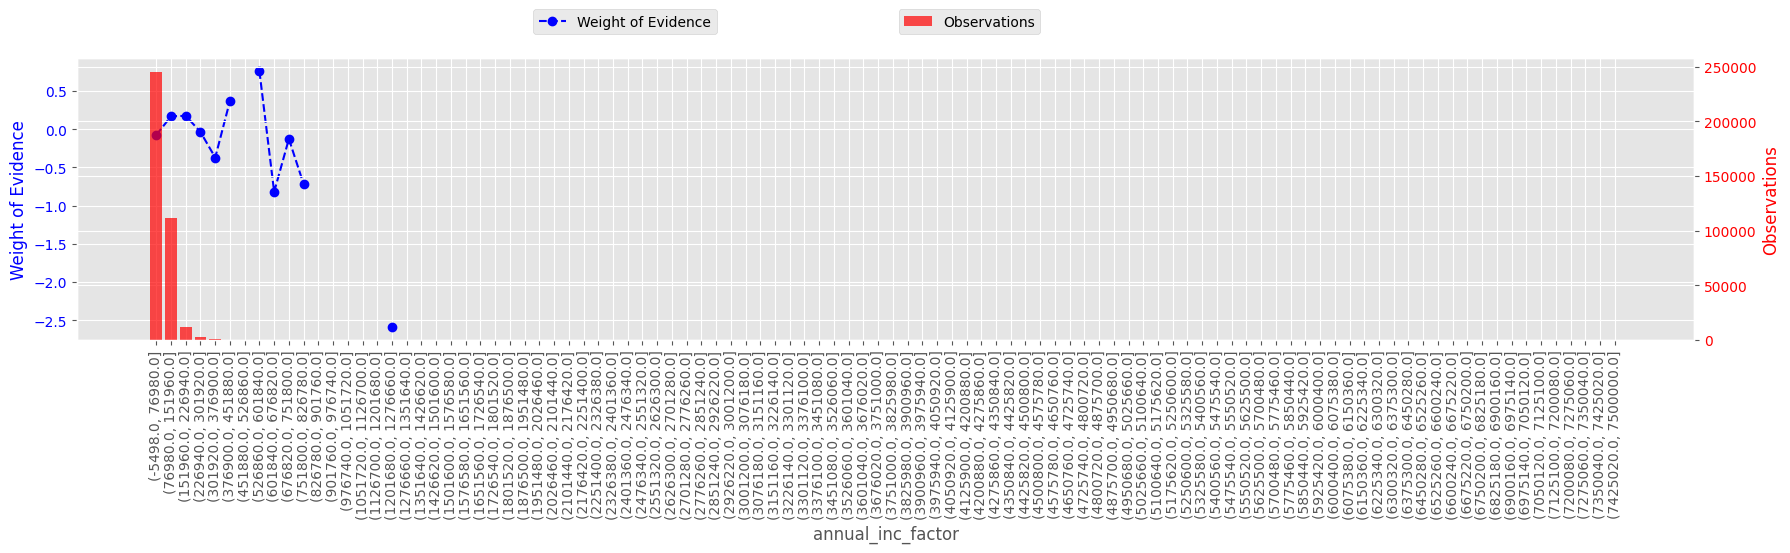

In [89]:
df_inputs_pp['annual_inc_factor'] = pd.cut(df_inputs_pp['annual_inc'], 100)
df_temp = woe_ordered_continuous(df_inputs_pp, 'annual_inc_factor', y_train)
display(df_temp)
plot_by_woe(df_temp,90)

The majority of income is under 150k, and after that the number of observations continues drop as it gets higher. <br>
We will set aside those higher than 150k as 1 group and explore the remaining income levels.


In [90]:
df_temp2 = df_inputs_pp.loc[df_inputs_pp['annual_inc'] <= 150000,:].copy()

,annual_inc_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(1852.0, 4960.0]",15,0.866667,0.000042,13.0,2.0,0.000037,0.000304,-2.100910,NaN,NaN,0.030823
1,"(4960.0, 7920.0]",42,0.880952,0.000118,37.0,5.0,0.000106,0.000759,-1.971232,0.014286,0.129678,0.030823
2,"(7920.0, 10880.0]",369,0.981030,0.001035,362.0,7.0,0.001034,0.001063,-0.026978,0.100077,1.944254,0.030823
3,"(10880.0, 13840.0]",693,0.974026,0.001943,675.0,18.0,0.001929,0.002732,-0.348371,0.007004,0.321393,0.030823
4,"(13840.0, 16800.0]",1453,0.976600,0.004075,1419.0,34.0,0.004054,0.005161,-0.241365,0.002574,0.107006,0.030823
5,"(16800.0, 19760.0]",1866,0.976956,0.005233,1823.0,43.0,0.005208,0.006527,-0.225673,0.000356,0.015692,0.030823
6,"(19760.0, 22720.0]",3529,0.972797,0.009896,3433.0,96.0,0.009808,0.014572,-0.395870,0.004159,0.170197,0.030823
7,"(22720.0, 25680.0]",6378,0.975854,0.017886,6224.0,154.0,0.017782,0.023376,-0.273496,0.003058,0.122374,0.030823
8,"(25680.0, 28640.0]",5713,0.975670,0.016021,5574.0,139.0,0.015925,0.021099,-0.281318,0.000185,0.007821,0.030823
9,"(28640.0, 31600.0]",10291,0.978136,0.028859,10066.0,225.0,0.028759,0.034153,-0.171894,0.002467,0.109424,0.030823


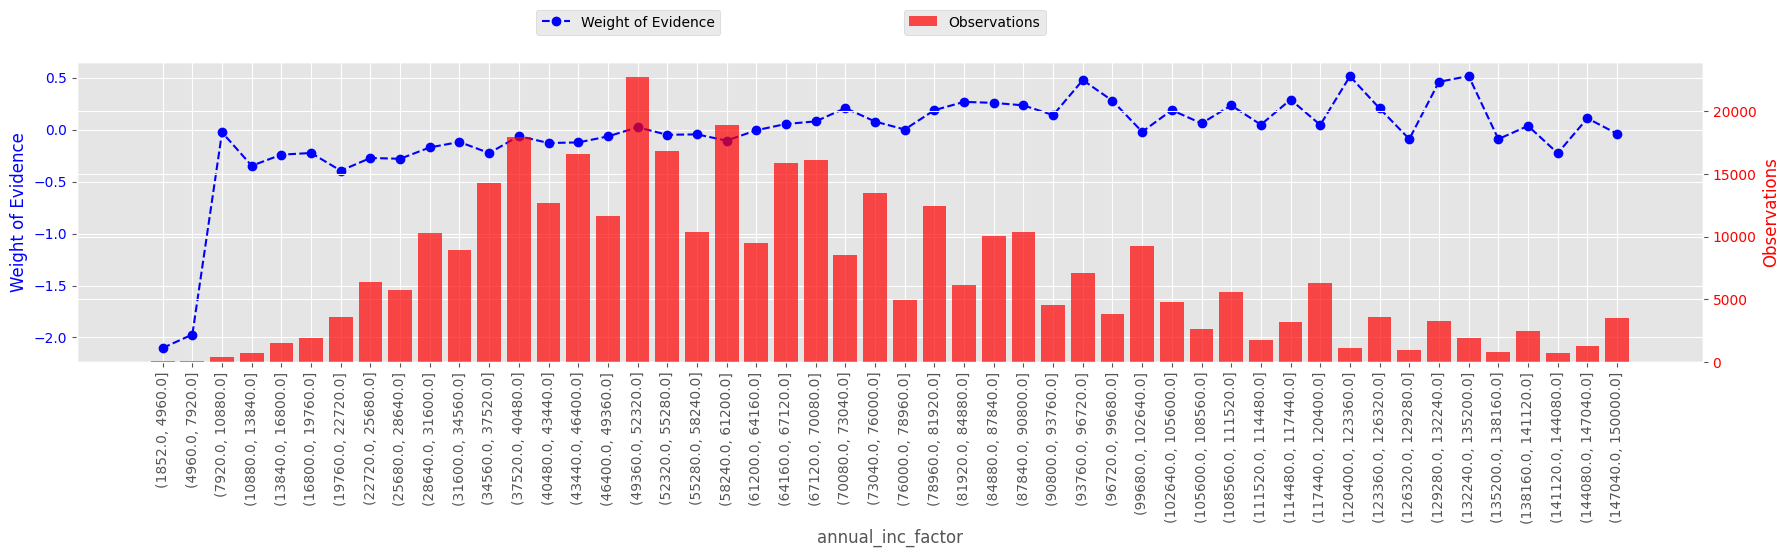

In [91]:
df_temp2['annual_inc_factor'] = pd.cut(df_temp2['annual_inc'], 50)
df_temp = woe_ordered_continuous(df_temp2, 'annual_inc_factor', y_train[df_temp2.index])
display(df_temp)
plot_by_woe(df_temp,90)

In [92]:
df_inputs_pp['annual_inc:<20k'] = np.where((df_inputs_pp['annual_inc'] <= 20_000),1,0)
df_inputs_pp['annual_inc:20k-30k'] = np.where((df_inputs_pp['annual_inc'] > 20_000) & (df_inputs_pp['annual_inc'] <= 30_000),1,0)
df_inputs_pp['annual_inc:30k-40k'] = np.where((df_inputs_pp['annual_inc'] > 30_000) & (df_inputs_pp['annual_inc'] <= 40_000),1,0)
df_inputs_pp['annual_inc:40k-50k'] = np.where((df_inputs_pp['annual_inc'] > 40_000) & (df_inputs_pp['annual_inc'] <= 50_000),1,0)
df_inputs_pp['annual_inc:50k-60k'] = np.where((df_inputs_pp['annual_inc'] > 50_000) & (df_inputs_pp['annual_inc'] <= 60_000),1,0)
df_inputs_pp['annual_inc:60k-70k'] = np.where((df_inputs_pp['annual_inc'] > 60_000) & (df_inputs_pp['annual_inc'] <= 70_000),1,0)
df_inputs_pp['annual_inc:70k-80k'] = np.where((df_inputs_pp['annual_inc'] > 70_000) & (df_inputs_pp['annual_inc'] <= 80_000),1,0)
df_inputs_pp['annual_inc:80k-90k'] = np.where((df_inputs_pp['annual_inc'] > 80_000) & (df_inputs_pp['annual_inc'] <= 90_000),1,0)
df_inputs_pp['annual_inc:90k-100k'] = np.where((df_inputs_pp['annual_inc'] > 90_000) & (df_inputs_pp['annual_inc'] <= 100_000),1,0)
df_inputs_pp['annual_inc:100k-120k'] = np.where((df_inputs_pp['annual_inc'] > 100_000) & (df_inputs_pp['annual_inc'] <= 120_000),1,0)
df_inputs_pp['annual_inc:120k-140k'] = np.where((df_inputs_pp['annual_inc'] > 120_000) & (df_inputs_pp['annual_inc'] <= 140_000),1,0)
df_inputs_pp['annual_inc:>140k'] = np.where((df_inputs_pp['annual_inc'] > 140_000),1,0)

# mths_since_last_delinq

Previously we saw that the variable had a lot of missing values, so to deal with this we will create a dummy variable for the missing values.

In [93]:
df_inputs_pp['mths_since_last_delinq'].isna().sum()

200072

,mths_since_last_delinq_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.188, 3.76]",5334,0.957255,0.030840,5106.0,228.0,0.030151,0.063210,-0.740259,NaN,NaN,inf
1,"(3.76, 7.52]",11045,0.975464,0.063860,10774.0,271.0,0.063620,0.075132,-0.166313,0.018209,0.573946,inf
2,"(7.52, 11.28]",13400,0.977910,0.077476,13104.0,296.0,0.077379,0.082063,-0.058772,0.002446,0.107541,inf
3,"(11.28, 15.04]",13208,0.977665,0.076366,12913.0,295.0,0.076251,0.081785,-0.070071,0.000245,0.011299,inf
4,"(15.04, 18.8]",9283,0.978994,0.053673,9088.0,195.0,0.053664,0.054062,-0.007375,0.001329,0.062696,inf
5,"(18.8, 22.56]",11695,0.978196,0.067618,11440.0,255.0,0.067553,0.070696,-0.045478,0.000798,0.038103,inf
6,"(22.56, 26.32]",10893,0.982099,0.062981,10698.0,195.0,0.063171,0.054062,0.155727,0.003903,0.201205,inf
7,"(26.32, 30.08]",10536,0.982821,0.060917,10355.0,181.0,0.061146,0.050180,0.197642,0.000722,0.041915,inf
8,"(30.08, 33.84]",7548,0.980525,0.043641,7401.0,147.0,0.043703,0.040754,0.069853,0.002296,0.127790,inf
9,"(33.84, 37.6]",9694,0.980400,0.056049,9504.0,190.0,0.056121,0.052675,0.063359,0.000124,0.006494,inf


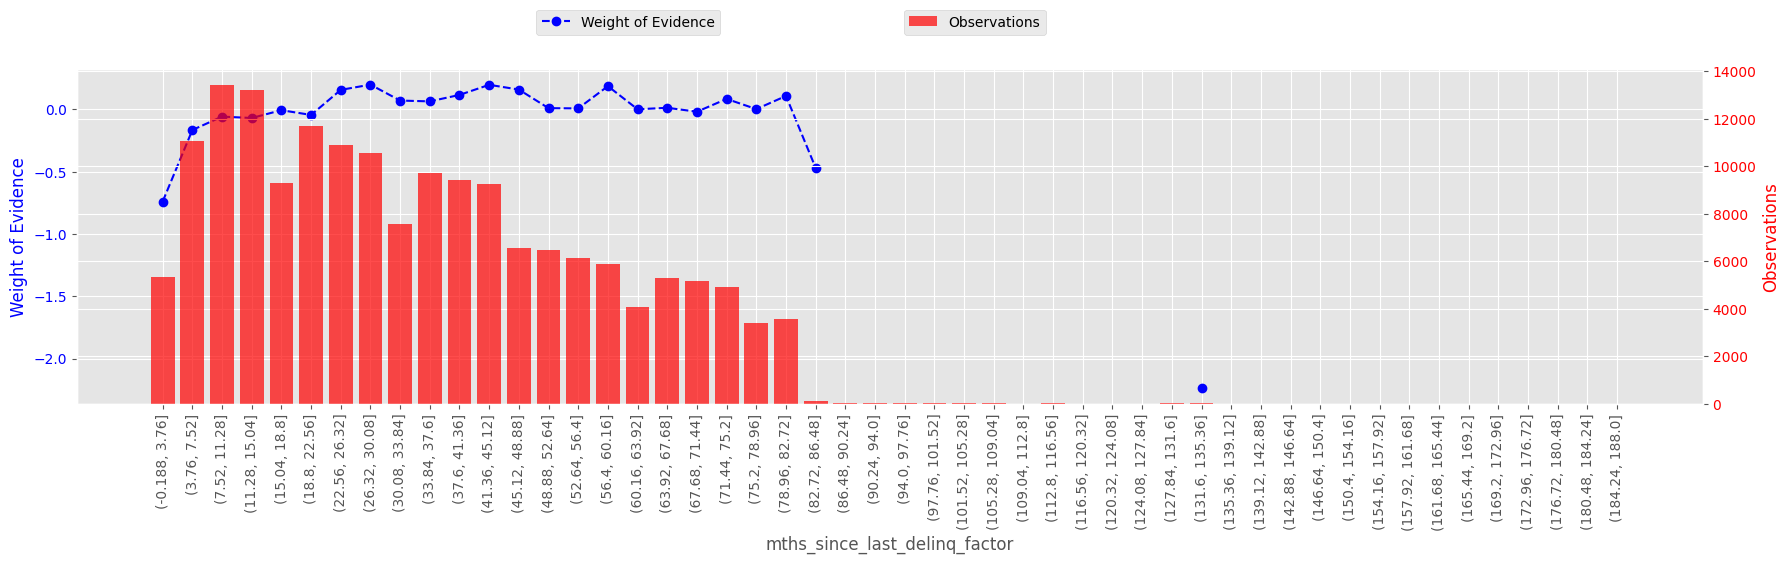

In [94]:
df_temp2 = df_inputs_pp[pd.notnull(df_inputs_pp['mths_since_last_delinq'])].copy()
df_temp2['mths_since_last_delinq_factor'] = pd.cut(df_temp2['mths_since_last_delinq'],50)
df_temp = woe_ordered_continuous(df_temp2,'mths_since_last_delinq_factor', y_train )
display(df_temp)
plot_by_woe(df_temp, 90)

In [95]:
df_inputs_pp['mths_since_last_delinq:Missing'] = np.where(df_inputs_pp['mths_since_last_delinq'].isnull(),1,0)
df_inputs_pp['mths_since_last_delinq:0-4'] = np.where((df_inputs_pp['mths_since_last_delinq'] >= 0) & (df_inputs_pp['mths_since_last_delinq'] <= 4),1,0)
df_inputs_pp['mths_since_last_delinq:5-23'] = np.where((df_inputs_pp['mths_since_last_delinq'] >= 5) & (df_inputs_pp['mths_since_last_delinq'] <= 23),1,0)
df_inputs_pp['mths_since_last_delinq:24-49'] = np.where((df_inputs_pp['mths_since_last_delinq'] >= 24) & (df_inputs_pp['mths_since_last_delinq'] <= 49),1,0)
df_inputs_pp['mths_since_last_delinq:>49'] = np.where((df_inputs_pp['mths_since_last_delinq'] > 49),1,0)                                                      

# dti

,dti_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.04, 0.4]",743,0.975774,0.001992,725.0,18.0,0.001980,0.002625,-0.281882,NaN,NaN,0.051327
1,"(0.4, 0.8]",793,0.992434,0.002126,787.0,6.0,0.002149,0.000875,0.898787,0.016660,1.180669,0.051327
2,"(0.8, 1.2]",941,0.986185,0.002523,928.0,13.0,0.002534,0.001896,0.290401,0.006249,0.608386,0.051327
3,"(1.2, 1.6]",1064,0.984023,0.002852,1047.0,17.0,0.002859,0.002479,0.142789,0.002162,0.147612,0.051327
4,"(1.6, 2.0]",1200,0.988333,0.003217,1186.0,14.0,0.003239,0.002041,0.461602,0.004311,0.318813,0.051327
...,...,...,...,...,...,...,...,...,...,...,...,...
95,"(37.991, 38.39]",208,0.966346,0.000558,201.0,7.0,0.000549,0.001021,-0.620287,0.009265,0.252808,0.051327
96,"(38.39, 38.79]",171,0.953216,0.000458,163.0,8.0,0.000445,0.001167,-0.963373,0.013130,0.343086,0.051327
97,"(38.79, 39.19]",194,0.958763,0.000520,186.0,8.0,0.000508,0.001167,-0.831377,0.005547,0.131996,0.051327
98,"(39.19, 39.59]",178,0.971910,0.000477,173.0,5.0,0.000472,0.000729,-0.433828,0.013147,0.397549,0.051327


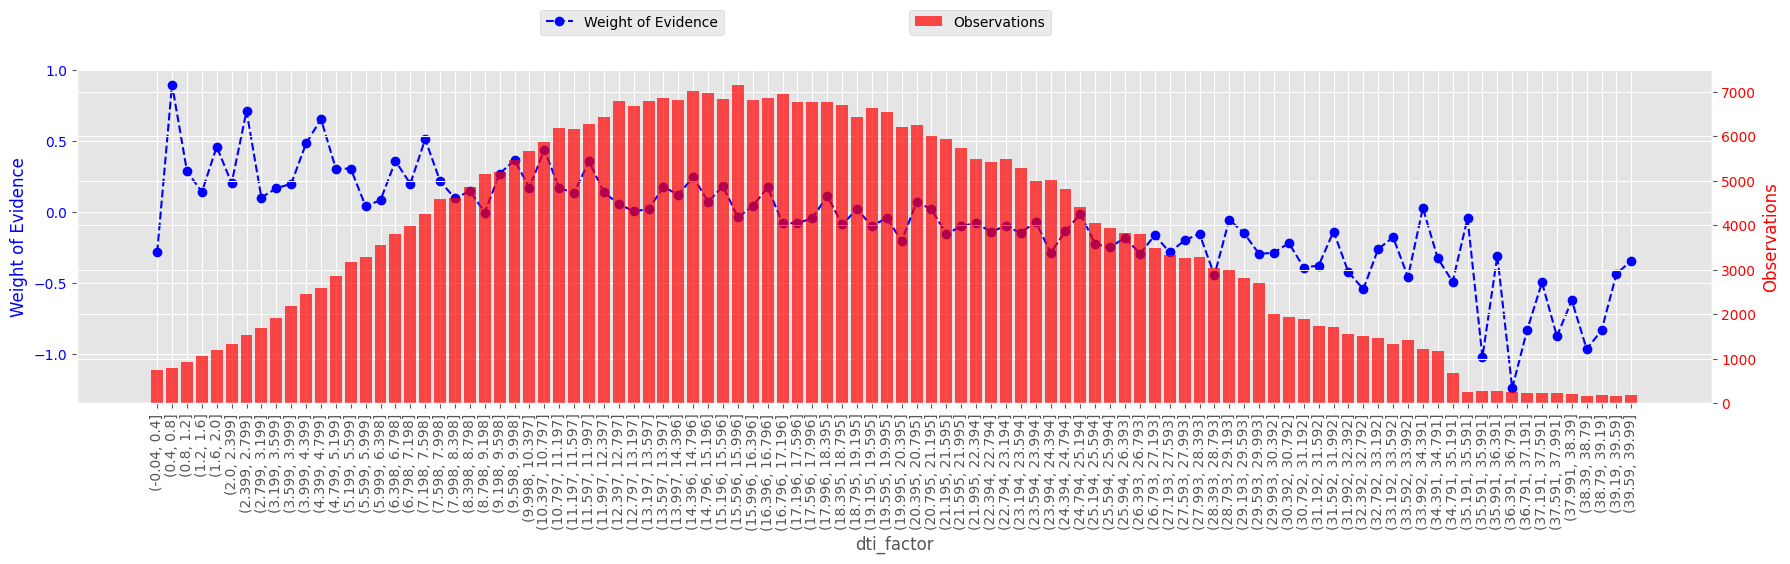

In [96]:
len(df_inputs_pp['dti'].unique())
df_inputs_pp['dti_factor'] = pd.cut(df_inputs_pp['dti'],100)
df_temp = woe_ordered_continuous(df_inputs_pp, 'dti_factor', y_train)
display(df_temp)
plot_by_woe(df_temp, 90)

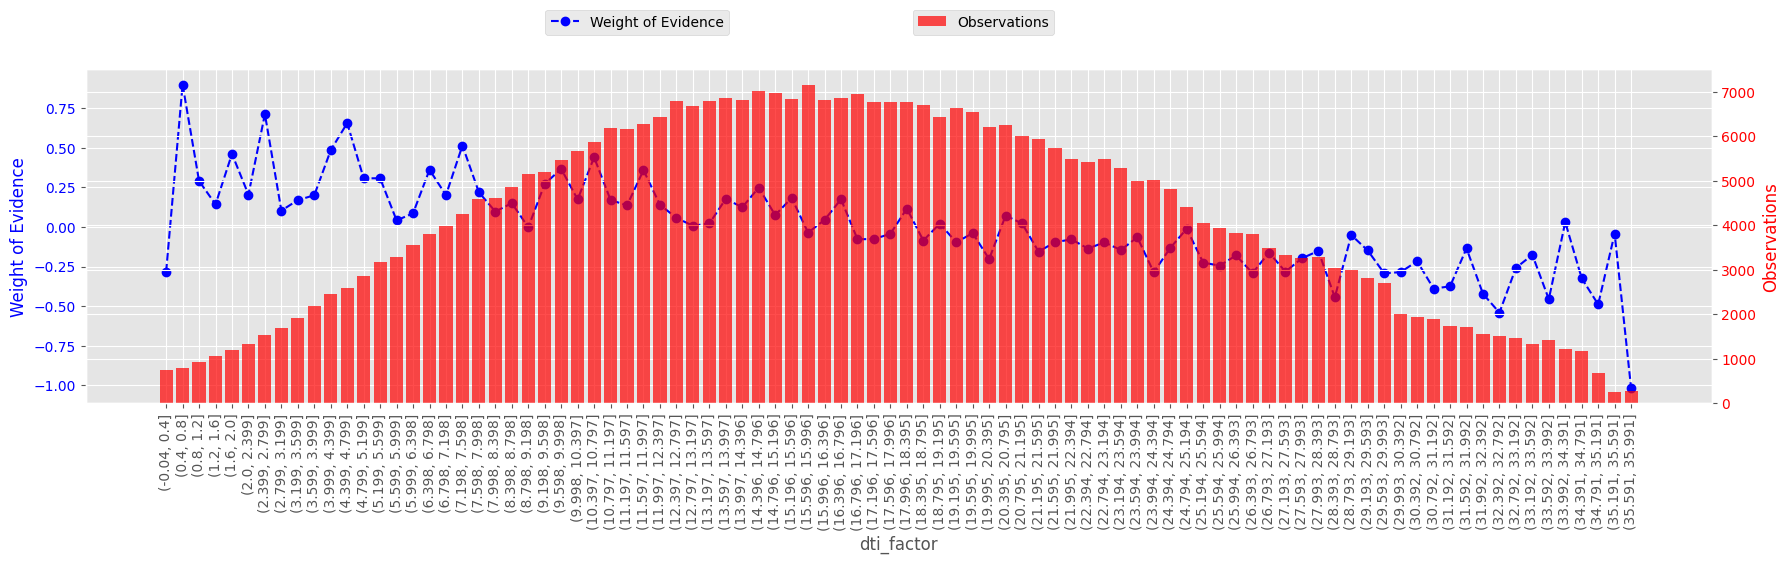

In [97]:
plot_by_woe(df_temp.iloc[: 90,], 90)

In [98]:
df_inputs_pp['dti:<4'] = np.where((df_inputs_pp['dti'] <= 4),1,0)
df_inputs_pp['dti:3.5-7.2'] = np.where((df_inputs_pp['dti'] > 4) & (df_inputs_pp['dti'] <= 7.2), 1, 0)
df_inputs_pp['dti:7.2-9.2'] = np.where((df_inputs_pp['dti'] > 7.2) & (df_inputs_pp['dti'] <= 9.2), 1, 0)
df_inputs_pp['dti:9.2-10.8'] = np.where((df_inputs_pp['dti'] > 9.2) & (df_inputs_pp['dti'] <= 10.8), 1, 0)
df_inputs_pp['dti:10.8-16'] = np.where((df_inputs_pp['dti'] > 10.8) & (df_inputs_pp['dti'] <= 16), 1, 0)
df_inputs_pp['dti:16-18'] = np.where((df_inputs_pp['dti'] > 16) & (df_inputs_pp['dti'] <= 18), 1, 0)
df_inputs_pp['dti:18-20.4'] = np.where((df_inputs_pp['dti'] > 18) & (df_inputs_pp['dti'] <= 20.4), 1, 0)
df_inputs_pp['dti:20.4-25.2'] = np.where((df_inputs_pp['dti'] > 20.4) & (df_inputs_pp['dti'] <= 25.2), 1, 0)
df_inputs_pp['dti:25.2-30'] = np.where((df_inputs_pp['dti'] > 25.2) & (df_inputs_pp['dti'] <= 30), 1, 0)
df_inputs_pp['dti:30-35'] = np.where((df_inputs_pp['dti'] > 30) & (df_inputs_pp['dti'] <= 35), 1, 0)
df_inputs_pp['dti:>35'] = np.where((df_inputs_pp['dti'] > 35),1,0)

# mths_since_last_record
this variable also had alot of missing values, so we will create a dummy variable for those.

In [99]:
df_inputs_pp['mths_since_last_record'].isna().sum()

322875

,mths_since_last_record_factor,n_obs,prop_good,prop_n_obs,n_good,n_bad,prop_n_good,prop_n_bad,WoE,diff_prop_good,diff_WoE,IV
0,"(-0.129, 2.58]",1078,0.845083,0.021494,911.0,167.0,0.018630,0.133280,-1.967688,NaN,NaN,inf
1,"(2.58, 5.16]",119,0.957983,0.002373,114.0,5.0,0.002331,0.003990,-0.537476,0.112900,1.430211,inf
2,"(5.16, 7.74]",129,0.976744,0.002572,126.0,3.0,0.002577,0.002394,0.073433,0.018761,0.610909,inf
3,"(7.74, 10.32]",242,0.975207,0.004825,236.0,6.0,0.004826,0.004789,0.007836,0.001538,0.065597,inf
4,"(10.32, 12.9]",202,0.965347,0.004028,195.0,7.0,0.003988,0.005587,-0.337147,0.009860,0.344983,inf
5,"(12.9, 15.48]",312,0.980769,0.006221,306.0,6.0,0.006258,0.004789,0.267589,0.015423,0.604736,inf
6,"(15.48, 18.06]",338,0.985207,0.006739,333.0,5.0,0.006810,0.003990,0.534468,0.004438,0.266879,inf
7,"(18.06, 20.64]",244,0.987705,0.004865,241.0,3.0,0.004928,0.002394,0.721948,0.002498,0.187480,inf
8,"(20.64, 23.22]",440,0.979545,0.008773,431.0,9.0,0.008814,0.007183,0.204647,0.008159,0.517301,inf
9,"(23.22, 25.8]",322,0.972050,0.006420,313.0,9.0,0.006401,0.007183,-0.115258,0.007496,0.319905,inf


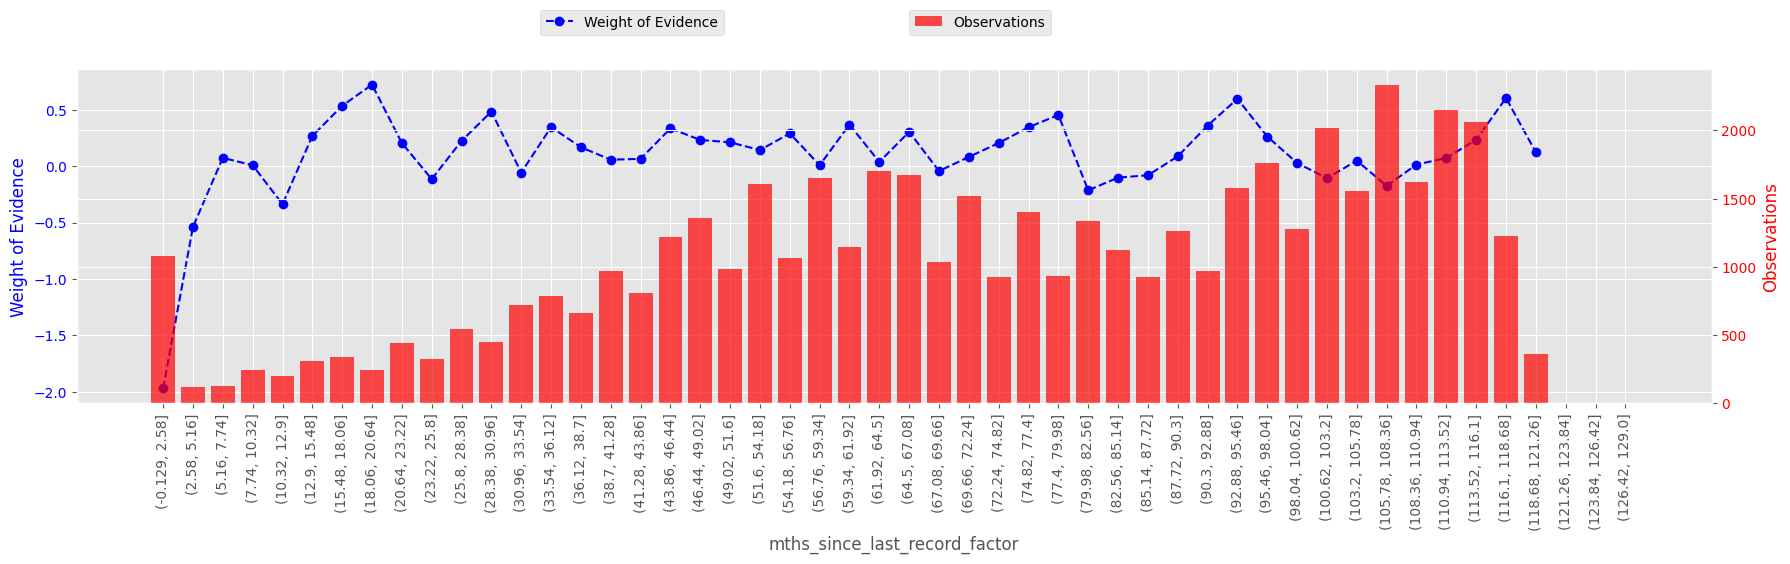

In [100]:
df_temp2 = df_inputs_pp[pd.notnull(df_inputs_pp['mths_since_last_record'])].copy()
df_temp2['mths_since_last_record_factor'] = pd.cut(df_temp2['mths_since_last_record'], 50)
df_temp = woe_ordered_continuous(df_temp2, 'mths_since_last_record_factor', y_train[df_temp2.index])
display(df_temp)
plot_by_woe(df_temp, 90)

In [101]:
df_inputs_pp['mths_since_last_record:Missing'] = np.where((df_inputs_pp['mths_since_last_record'].isnull()), 1, 0)
df_inputs_pp['mths_since_last_record:0-2'] = np.where((df_inputs_pp['mths_since_last_record'] >= 0) & (df_inputs_pp['mths_since_last_record'] <= 2), 1, 0)
df_inputs_pp['mths_since_last_record:3-20'] = np.where((df_inputs_pp['mths_since_last_record'] > 2) & (df_inputs_pp['mths_since_last_record'] <= 20), 1, 0)
df_inputs_pp['mths_since_last_record:21-31'] = np.where((df_inputs_pp['mths_since_last_record'] > 20) & (df_inputs_pp['mths_since_last_record'] <= 31), 1, 0)
df_inputs_pp['mths_since_last_record:32-80'] = np.where((df_inputs_pp['mths_since_last_record'] > 31) & (df_inputs_pp['mths_since_last_record'] <= 80), 1, 0)
df_inputs_pp['mths_since_last_record:81-95'] = np.where((df_inputs_pp['mths_since_last_record'] > 80) & (df_inputs_pp['mths_since_last_record'] <= 95), 1, 0)
df_inputs_pp['mths_since_last_record:>95'] = np.where((df_inputs_pp['mths_since_last_record'] > 95),1,0)

### Now that were are done we will create a function to do all these transformations to our test data set.

In [102]:
def bin_data(df):
    df['home_ownership:RENT_OTHER_NONE_ANY'] = sum([df['home_ownership:RENT'],
                                                             df['home_ownership:OTHER'],
                                                             df['home_ownership:NONE'],
                                                             df['home_ownership:ANY']])
    
    if ['addr_state:ND'] in df.columns.values:
        pass
    else:
        df['addr_state:ND'] = 0
        
    df['addr_state:NE_IA_ND_MT_MS_TN_HI_NV'] = sum([df['addr_state:NE'],
                                                            df['addr_state:IA'],
                                                            df['addr_state:ND'],
                                                            df['addr_state:MT'],
                                                            df['addr_state:MS'],
                                                            df['addr_state:TN'],
                                                            df['addr_state:HI'],
                                                            df['addr_state:NV']
                                                            ])

    df['addr_state:PA_VA_RI'] = sum([df['addr_state:PA'],
                                            df['addr_state:VA'],
                                            df['addr_state:RI']
                                            ])

    df['addr_state:OK_MD_LA_IN'] = sum([df['addr_state:OK'],
                                                df['addr_state:MD'],
                                                df['addr_state:LA'],
                                                df['addr_state:IN']
                                                ])

    df['addr_state:AZ_NC_AR'] = sum([df['addr_state:AZ'],
                                             df['addr_state:NC'],
                                             df['addr_state:AR']])


    df['addr_state:AL_GA_OH_MA_MI'] =sum([df['addr_state:AL'],
                                                  df['addr_state:GA'],
                                                  df['addr_state:OH'],
                                                  df['addr_state:MA'],
                                                  df['addr_state:MI']])

    df['addr_state:UT_MO_NJ_WV'] = sum([df['addr_state:UT'],
                                                df['addr_state:MO'],
                                                df['addr_state:NJ'],
                                                df['addr_state:WV']])

    df['addr_state:SC_CO_NM_WI_IL_MN'] = sum([df['addr_state:SC'],
                                                      df['addr_state:CO'],
                                                      df['addr_state:NM'],
                                                      df['addr_state:WI'],
                                                      df['addr_state:IL'],
                                                      df['addr_state:MN']])

    df['addr_state:OR_WA_KY'] = sum([df['addr_state:OR'],
                                             df['addr_state:WA'],
                                             df['addr_state:KY']])

    df['addr_state:VT_AK_NH_CT_DC'] = sum([df['addr_state:VT'],
                                                   df['addr_state:AK'],
                                                   df['addr_state:NH'],
                                                   df['addr_state:CT'],
                                                   df['addr_state:DC']])

    df['addr_state:ME_ID_WY_KS'] = sum([df['addr_state:ME'],
                                                df['addr_state:ID'],
                                                df['addr_state:WY'],
                                                df['addr_state:KS']])
    df['purpose:educ_sbus_moving_other_med'] = sum([df['purpose:educational'],
                                                             df['purpose:small_business'],
                                                             df['purpose:moving'],
                                                             df['purpose:other'],
                                                             df['purpose:medical']
                                                             ])

    df['purpose:house_home_improv_vacation'] = sum([df['purpose:house'],
                                                             df['purpose:home_improvement'],
                                                             df['purpose:vacation']
                                                             ])

    df['purpose:major_purch_car_wedding_ren_energy'] = sum([df['purpose:major_purchase'],
                                                                     df['purpose:car'],
                                                                     df['purpose:wedding'],
                                                                     df['purpose:renewable_energy']])
    
    df['terms:36'] = np.where((df['term'] == 36), 1, 0)
    df['terms:60'] = np.where((df['term'] == 60), 1, 0)

    df['emp_length:0'] = np.where(df['emp_length'].isin([0]), 1, 0)
    df['emp_length:1'] = np.where(df['emp_length'].isin([1]), 1, 0)
    df['emp_length:2-4'] = np.where(df['emp_length'].isin([2,3,4]), 1, 0)
    df['emp_length:5'] = np.where(df['emp_length'].isin([5]), 1, 0)
    df['emp_length:6-7'] = np.where(df['emp_length'].isin([6,7]), 1, 0)
    df['emp_length:8-9'] = np.where(df['emp_length'].isin([8,9]), 1, 0)
    df['emp_length:10'] = np.where(df['emp_length'].isin([10]), 1, 0)

    df['mths_since_issue_d:<38'] = np.where(df['mths_since_issue_d'].isin(range(38)),1,0)
    df['mths_since_issue_d:38-47'] = np.where(df['mths_since_issue_d'].isin(range(38,48)),1,0)
    df['mths_since_issue_d:48-51'] = np.where(df['mths_since_issue_d'].isin(range(48,51)),1,0)
    df['mths_since_issue_d:52-56'] = np.where(df['mths_since_issue_d'].isin(range(52,57)),1,0)
    df['mths_since_issue_d:57-60'] = np.where(df['mths_since_issue_d'].isin(range(57,61)),1,0)
    df['mths_since_issue_d:60-83'] = np.where(df['mths_since_issue_d'].isin(range(60,84)),1,0)
    df['mths_since_issue_d:>84'] = np.where((df['mths_since_issue_d'] > 84),1,0)

    df['int_rate:<8.31'] = np.where((df['int_rate'] <= 8.31),1,0)
    df['int_rate:8.31-9.961'] = np.where((df['int_rate'] > 8.31) & (df['int_rate'] <= 9.961),1,0)
    df['int_rate:9.961-12.025'] = np.where((df['int_rate'] > 9.961) & (df['int_rate'] <= 12.025),1,0)
    df['int_rate:12.025-15.327'] = np.where((df['int_rate'] > 12.025) & (df['int_rate'] <= 15.327),1,0)
    df['int_rate:15.327-19.455'] = np.where((df['int_rate'] > 15.327) & (df['int_rate'] <= 19.455),1,0)
    df['int_rate:19.455-23.583'] = np.where((df['int_rate'] > 19.455) & (df['int_rate'] <= 23.583),1,0)
    df['int_rate:>23.583'] = np.where((df['int_rate'] > 23.583),1,0)

    df['mths_since_earliest_cr_line:<106'] = np.where((df['mths_since_earliest_cr_line'] <= 106),1,0)
    df['mths_since_earliest_cr_line:107-141'] = np.where(df['mths_since_earliest_cr_line'].isin(range(107,142)),1,0)
    df['mths_since_earliest_cr_line:142-177'] = np.where(df['mths_since_earliest_cr_line'].isin(range(142,178)),1,0)
    df['mths_since_earliest_cr_line:178-354'] = np.where(df['mths_since_earliest_cr_line'].isin(range(178,355)),1,0)
    df['mths_since_earliest_cr_line:>354'] = np.where((df['mths_since_earliest_cr_line'] >= 354),1,0)

    df['delinq_2yrs:0'] = np.where((df['delinq_2yrs'] == 0), 1, 0)
    df['delinq_2yrs:1-3'] = np.where((df['delinq_2yrs'] >= 1) & (df['delinq_2yrs'] <= 3), 1, 0)
    df['delinq_2yrs:>=4'] = np.where((df['delinq_2yrs'] >= 9), 1, 0)

    df['inq_last_6mths:0'] = np.where((df['inq_last_6mths'] == 0), 1, 0)
    df['inq_last_6mths:1-3'] = np.where((df['inq_last_6mths'] >= 1) & (df['inq_last_6mths'] <= 3), 1, 0)
    df['inq_last_6mths:4-6'] = np.where((df['inq_last_6mths'] >= 4) & (df['inq_last_6mths'] <= 6), 1, 0)
    df['inq_last_6mths:>6'] = np.where((df['inq_last_6mths'] > 6), 1, 0)

    df['open_acc:0-4'] = np.where((df['open_acc'] < 5), 1, 0)
    df['open_acc:5-13'] = np.where((df['open_acc'] >= 5) & (df['open_acc'] <= 13), 1, 0)
    df['open_acc:14-22'] = np.where((df['open_acc'] >= 14) & (df['open_acc'] <= 22), 1, 0)
    df['open_acc:23-25'] = np.where((df['open_acc'] >= 23) & (df['open_acc'] <= 25), 1, 0)
    df['open_acc:>25'] = np.where((df['open_acc'] > 25), 1, 0)

    df['pub_rec:0-2'] = np.where((df['pub_rec'] >= 0) & (df['pub_rec'] <= 2), 1, 0)
    df['pub_rec:3-4'] = np.where((df['pub_rec'] >= 3) & (df['pub_rec'] <= 4), 1, 0)
    df['pub_rec:>=5'] = np.where((df['pub_rec'] >= 5), 1, 0)

    df['total_acc:<=27'] = np.where((df['total_acc'] <= 27), 1, 0)
    df['total_acc:28-51'] = np.where((df['total_acc'] >= 28) & (df['total_acc'] <= 48), 1, 0)
    df['total_acc:>=52'] = np.where((df['total_acc'] >= 49), 1, 0)

    df['acc_now_delinq:0'] = np.where((df['acc_now_delinq'] == 0), 1, 0)
    df['acc_now_delinq:>0'] = np.where((df['acc_now_delinq'] > 0), 1, 0)

    df['annual_inc:<20k'] = np.where((df['annual_inc'] <= 20_000),1,0)
    df['annual_inc:20k-30k'] = np.where((df['annual_inc'] > 20_000) & (df['annual_inc'] <= 30_000),1,0)
    df['annual_inc:30k-40k'] = np.where((df['annual_inc'] > 30_000) & (df['annual_inc'] <= 40_000),1,0)
    df['annual_inc:40k-50k'] = np.where((df['annual_inc'] > 40_000) & (df['annual_inc'] <= 50_000),1,0)
    df['annual_inc:50k-60k'] = np.where((df['annual_inc'] > 50_000) & (df['annual_inc'] <= 60_000),1,0)
    df['annual_inc:60k-70k'] = np.where((df['annual_inc'] > 60_000) & (df['annual_inc'] <= 70_000),1,0)
    df['annual_inc:70k-80k'] = np.where((df['annual_inc'] > 70_000) & (df['annual_inc'] <= 80_000),1,0)
    df['annual_inc:80k-90k'] = np.where((df['annual_inc'] > 80_000) & (df['annual_inc'] <= 90_000),1,0)
    df['annual_inc:90k-100k'] = np.where((df['annual_inc'] > 90_000) & (df['annual_inc'] <= 100_000),1,0)
    df['annual_inc:100k-120k'] = np.where((df['annual_inc'] > 100_000) & (df['annual_inc'] <= 120_000),1,0)
    df['annual_inc:120k-140k'] = np.where((df['annual_inc'] > 120_000) & (df['annual_inc'] <= 140_000),1,0)
    df['annual_inc:>140k'] = np.where((df['annual_inc'] > 140_000),1,0)

    df['mths_since_last_delinq:Missing'] = np.where(df['mths_since_last_delinq'].isnull(),1,0)
    df['mths_since_last_delinq:0-4'] = np.where((df['mths_since_last_delinq'] >= 0) & (df['mths_since_last_delinq'] <= 4),1,0)
    df['mths_since_last_delinq:5-23'] = np.where((df['mths_since_last_delinq'] >= 5) & (df['mths_since_last_delinq'] <= 23),1,0)
    df['mths_since_last_delinq:24-49'] = np.where((df['mths_since_last_delinq'] >= 24) & (df['mths_since_last_delinq'] <= 49),1,0)
    df['mths_since_last_delinq:>49'] = np.where((df['mths_since_last_delinq'] > 49),1,0)

    df['dti:<4'] = np.where((df['dti'] <= 4),1,0)
    df['dti:3.5-7.2'] = np.where((df['dti'] > 4) & (df['dti'] <= 7.2), 1, 0)
    df['dti:7.2-9.2'] = np.where((df['dti'] > 7.2) & (df['dti'] <= 9.2), 1, 0)
    df['dti:9.2-10.8'] = np.where((df['dti'] > 9.2) & (df['dti'] <= 10.8), 1, 0)
    df['dti:10.8-16'] = np.where((df['dti'] > 10.8) & (df['dti'] <= 16), 1, 0)
    df['dti:16-18'] = np.where((df['dti'] > 16) & (df['dti'] <= 13.6), 1, 0)
    df['dti:18-20.4'] = np.where((df['dti'] > 18) & (df['dti'] <= 20.4), 1, 0)
    df['dti:20.4-25.2'] = np.where((df['dti'] > 20.4) & (df['dti'] <= 25.2), 1, 0)
    df['dti:25.2-30'] = np.where((df['dti'] > 25.2) & (df['dti'] <= 30), 1, 0)
    df['dti:30-35'] = np.where((df['dti'] > 30) & (df['dti'] <= 35), 1, 0)
    df['dti:>35'] = np.where((df['dti'] > 35),1,0)

    df['mths_since_last_record:Missing'] = np.where((df['mths_since_last_record'].isnull()), 1, 0)
    df['mths_since_last_record:0-2'] = np.where((df['mths_since_last_record'] >= 0) & (df['mths_since_last_record'] <= 2), 1, 0)
    df['mths_since_last_record:3-20'] = np.where((df['mths_since_last_record'] > 2) & (df['mths_since_last_record'] <= 20), 1, 0)
    df['mths_since_last_record:21-31'] = np.where((df['mths_since_last_record'] > 20) & (df['mths_since_last_record'] <= 31), 1, 0)
    df['mths_since_last_record:32-80'] = np.where((df['mths_since_last_record'] > 31) & (df['mths_since_last_record'] <= 80), 1, 0)
    df['mths_since_last_record:81-95'] = np.where((df['mths_since_last_record'] > 80) & (df['mths_since_last_record'] <= 95), 1, 0)
    df['mths_since_last_record:>95'] = np.where((df['mths_since_last_record'] > 95),1,0)

    return df

# We will run our function on our test and train set

In [103]:
df_X_train = bin_data(X_train)
df_X_test = bin_data(X_test)

df_X_train.to_csv('data/loan_data_inputs_train.csv')
df_X_test.to_csv('data/loan_data_inputs_test.csv')
y_test.to_csv('data/loan_data_targets_test.csv')
y_train.to_csv('data/loan_data_targets_train.csv')

C:\Users\tberv\AppData\Local\Temp\ipykernel_5520\3350354544.py:180: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['mths_since_last_record:21-31'] = np.where((df['mths_since_last_record'] > 20) & (df['mths_since_last_record'] <= 31), 1, 0)
C:\Users\tberv\AppData\Local\Temp\ipykernel_5520\3350354544.py:181: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['mths_since_last_record:32-80'] = np.where((df['mths_since_last_record'] > 31) & (df['mths_since_last_record'] <= 80), 1, 0)
C:\Users\tberv\AppData\Local\Temp\ipykernel_5520\3